<b><font color="SteelBlue" size="+3">Anticipez les besoins en consommation de bâtiments</font></b>

# Introduction

## Contexte

Le projet se situe dans le cadre des efforts de la ville de Seattle pour atteindre son objectif de neutralité carbone d'ici 2050, un enjeu majeur dans la lutte contre le changement climatique. L'accent est mis sur l'analyse de la consommation énergétique et des émissions de dioxyde de carbone (CO2) des bâtiments non résidentiels, une composante significative de l'empreinte carbone de la ville. Pour cela, la ville dispose de données collectées en 2016, reflétant les consommations et émissions des bâtiments à cette période. Ces données, bien que précieuses, sont coûteuses et laborieuses à obtenir, d'où l'intérêt de développer un modèle prédictif capable d'estimer ces indicateurs pour les bâtiments non encore analysés, basé sur des caractéristiques structurelles telles que la taille, l'usage, la date de construction, ou encore la situation géographique des bâtiments.

## Objectifs

Tout d'abvord, réaliser une analyse exploratoire des données disponibles afin d'identifier les tendances, les anomalies et les relations potentielles entre les différentes variables. Et ensuite tester et comparer différents modèles de machine learning pour prédire avec précision la consommation totale d'énergie et les émissions de CO2 des bâtiments non résidentiels, sans données de consommation annuelle future, pour éviter toute fuite de données. Un intérêt particulier est porté à l'évaluation de l'utilité de l'"ENERGY STAR Score", un indicateur potentiellement pertinent mais complexe à calculer avec les méthodes actuelles. 

## Imports

In [1]:
# Chargement des librairies
# Builtin
import os

# Data
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from IPython.display import Image

## Data

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'Council District Map - 2024 - FULL.png',
 'data',
 'Deveau_Estelle_1_notebook_exploratoire_022024.ipynb',
 'Map_of_Seattle,_divided_by_districts.png',
 'Pélec_01_EDA.ipynb',
 'Pélec_02_Modelisation.ipynb']

In [3]:
os.listdir("data/sources/")

['2016_Building_Energy_Benchmarking.csv']

In [4]:
path     = "./data/sources/"
filename = "2016_Building_Energy_Benchmarking.csv"

In [5]:
data = pd.read_csv(path + filename)

In [6]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Exploration des données

## Quick tour

In [7]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [8]:
data.shape

(3376, 46)

In [9]:
data.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
Name: count, dtype: int64

In [10]:
data.describe()

,OSEBuildingID,DataYear,ZipCode,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3376.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21208.991114,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12223.757015,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.000000e+00,NaN,-0.800000,-0.020000
25%,19990.750000,2016.0,98105.000000,3.000000,47.599860,-122.350662,1948.000000,1.000000,2.000000,2.848700e+04,0.000000,2.775600e+04,2.509475e+04,5000.000000,2239.000000,53.000000,27.900000,29.400000,74.699997,78.400002,9.251286e+05,9.701822e+05,0.000000e+00,1.874229e+05,6.394870e+05,0.000000e+00,0.000000e+00,NaN,9.495000,0.210000
50%,23112.000000,2016.0,98115.000000,4.000000,47.618675,-122.332495,1975.000000,1.000000,4.000000,4.417500e+04,0.000000,4.321600e+04,3.989400e+04,10664.000000,5043.000000,75.000000,38.599998,40.900002,96.199997,101.099998,1.803753e+06,1.904452e+06,0.000000e+00,3.451299e+05,1.177583e+06,3.237538e+03,3.237540e+05,NaN,33.920000,0.610000
75%,25994.250000,2016.0,98122.000000,7.000000,47.657115,-122.319407,1997.000000,1.000000,5.000000,9.099200e+04,0.000000,8.427625e+04,7.620025e+04,26640.000000,10138.750000,90.000000,60.400002,64.275002,143.899994,148.349998,4.222455e+06,4.381429e+06,0.000000e+00,8.293178e+05,2.829632e+06,1.189033e+04,1.189034e+06,NaN,93.940000,1.370000
max,50226.000000,2016.0,98272.000000,7.000000,47.733870,-122.220966,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.349435e+08,1.925775e+08,6.570744e+08,2.979090e+06,2.979090e+08,NaN,16870.980000,34.090000


In [11]:
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [12]:
# Valeurs manquantes
missing_values_count = data.isnull().sum()
total_cells = np.product(data.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 12.85 %


In [13]:
percent_missing_values =  round((missing_values_count / len(data)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
OSEBuildingID,0,0.00
DataYear,0,0.00
BuildingType,0,0.00
PrimaryPropertyType,0,0.00
PropertyName,0,0.00
Address,0,0.00
City,0,0.00
State,0,0.00
ZipCode,16,0.47
TaxParcelIdentificationNumber,0,0.00


<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

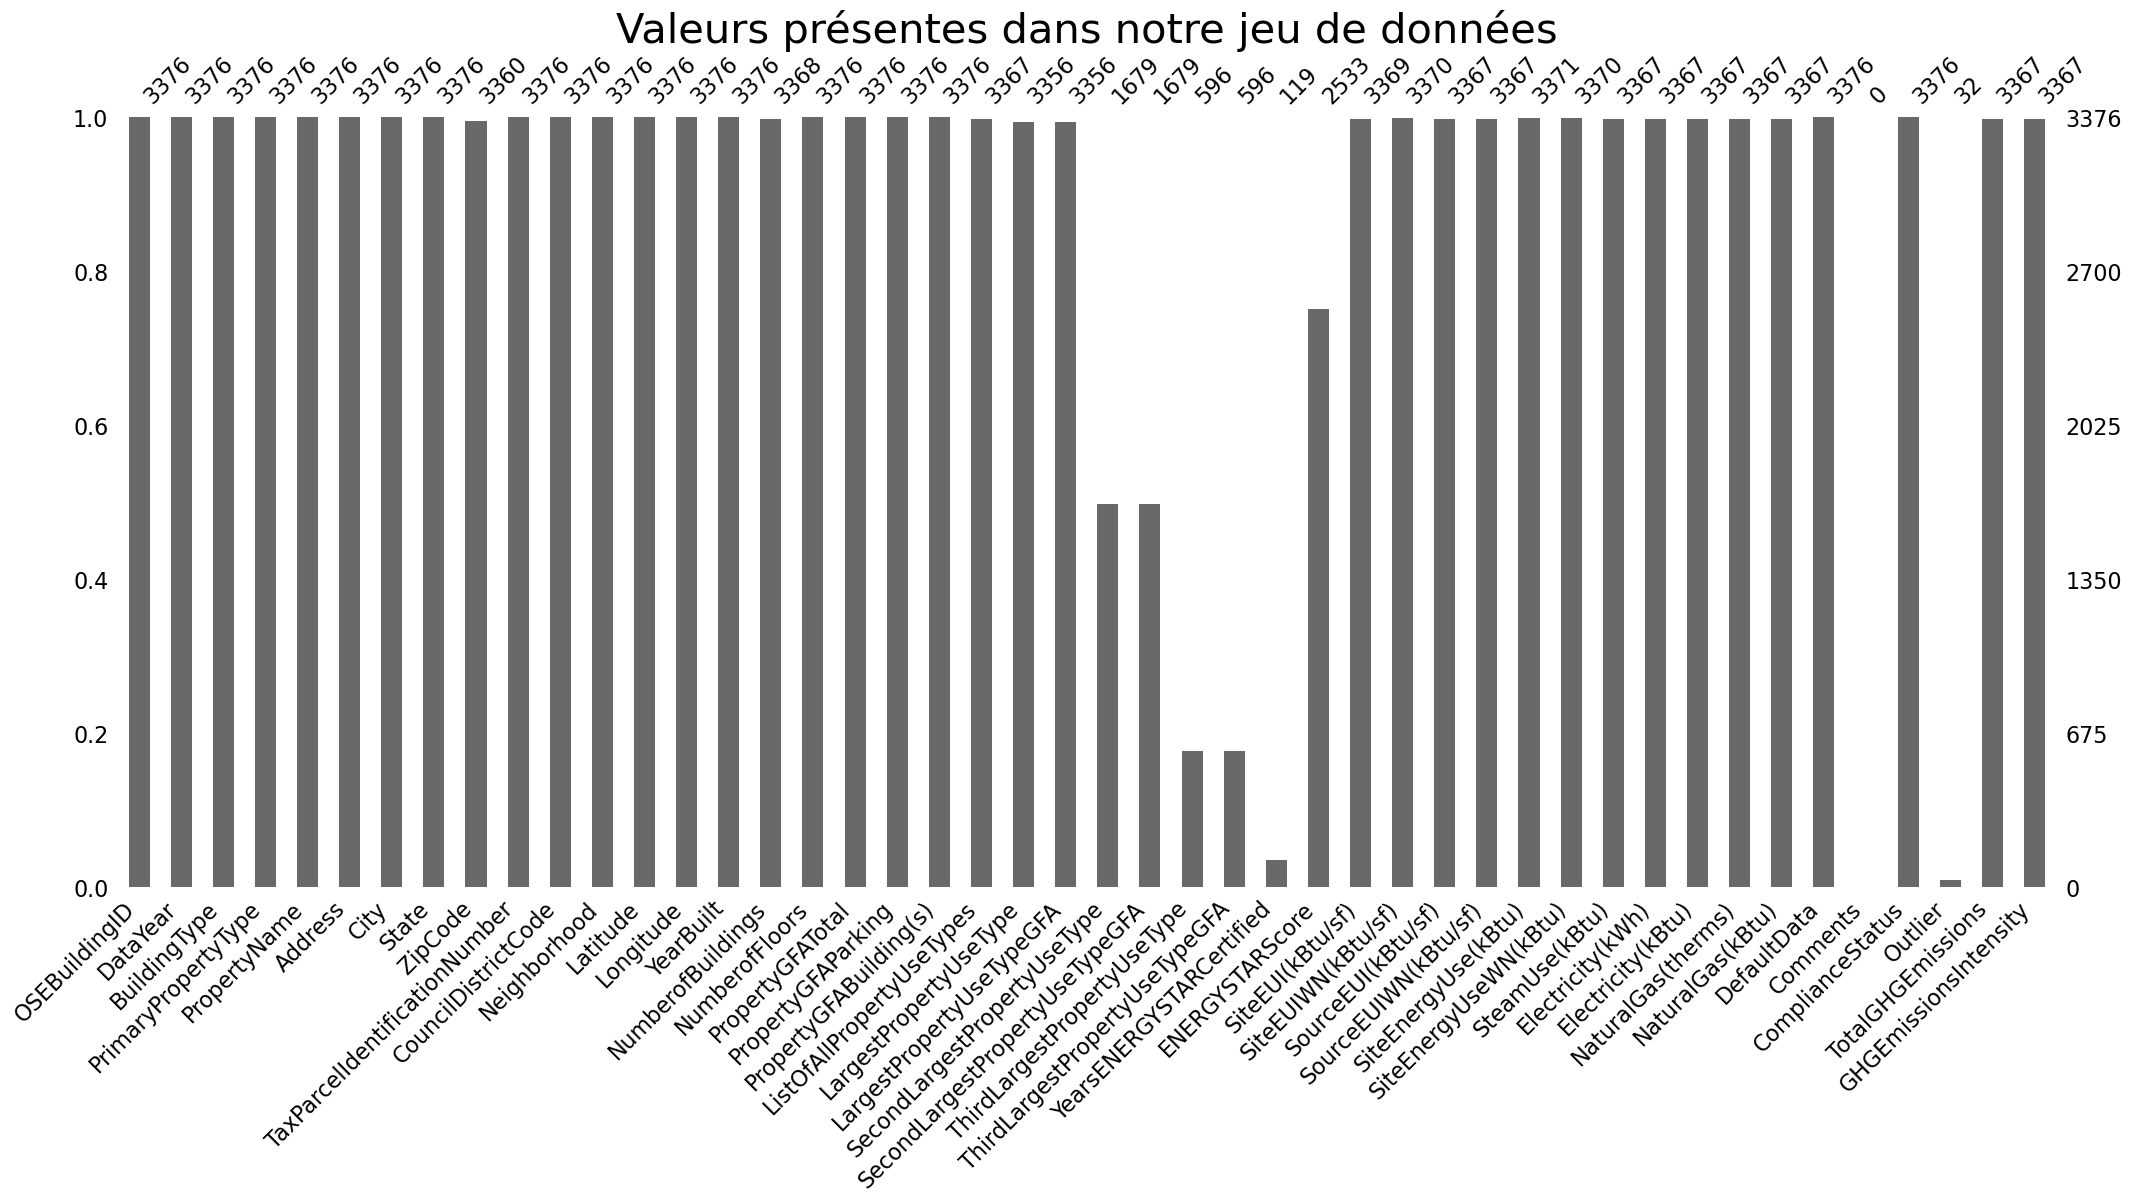

In [14]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(data)

<Axes: >

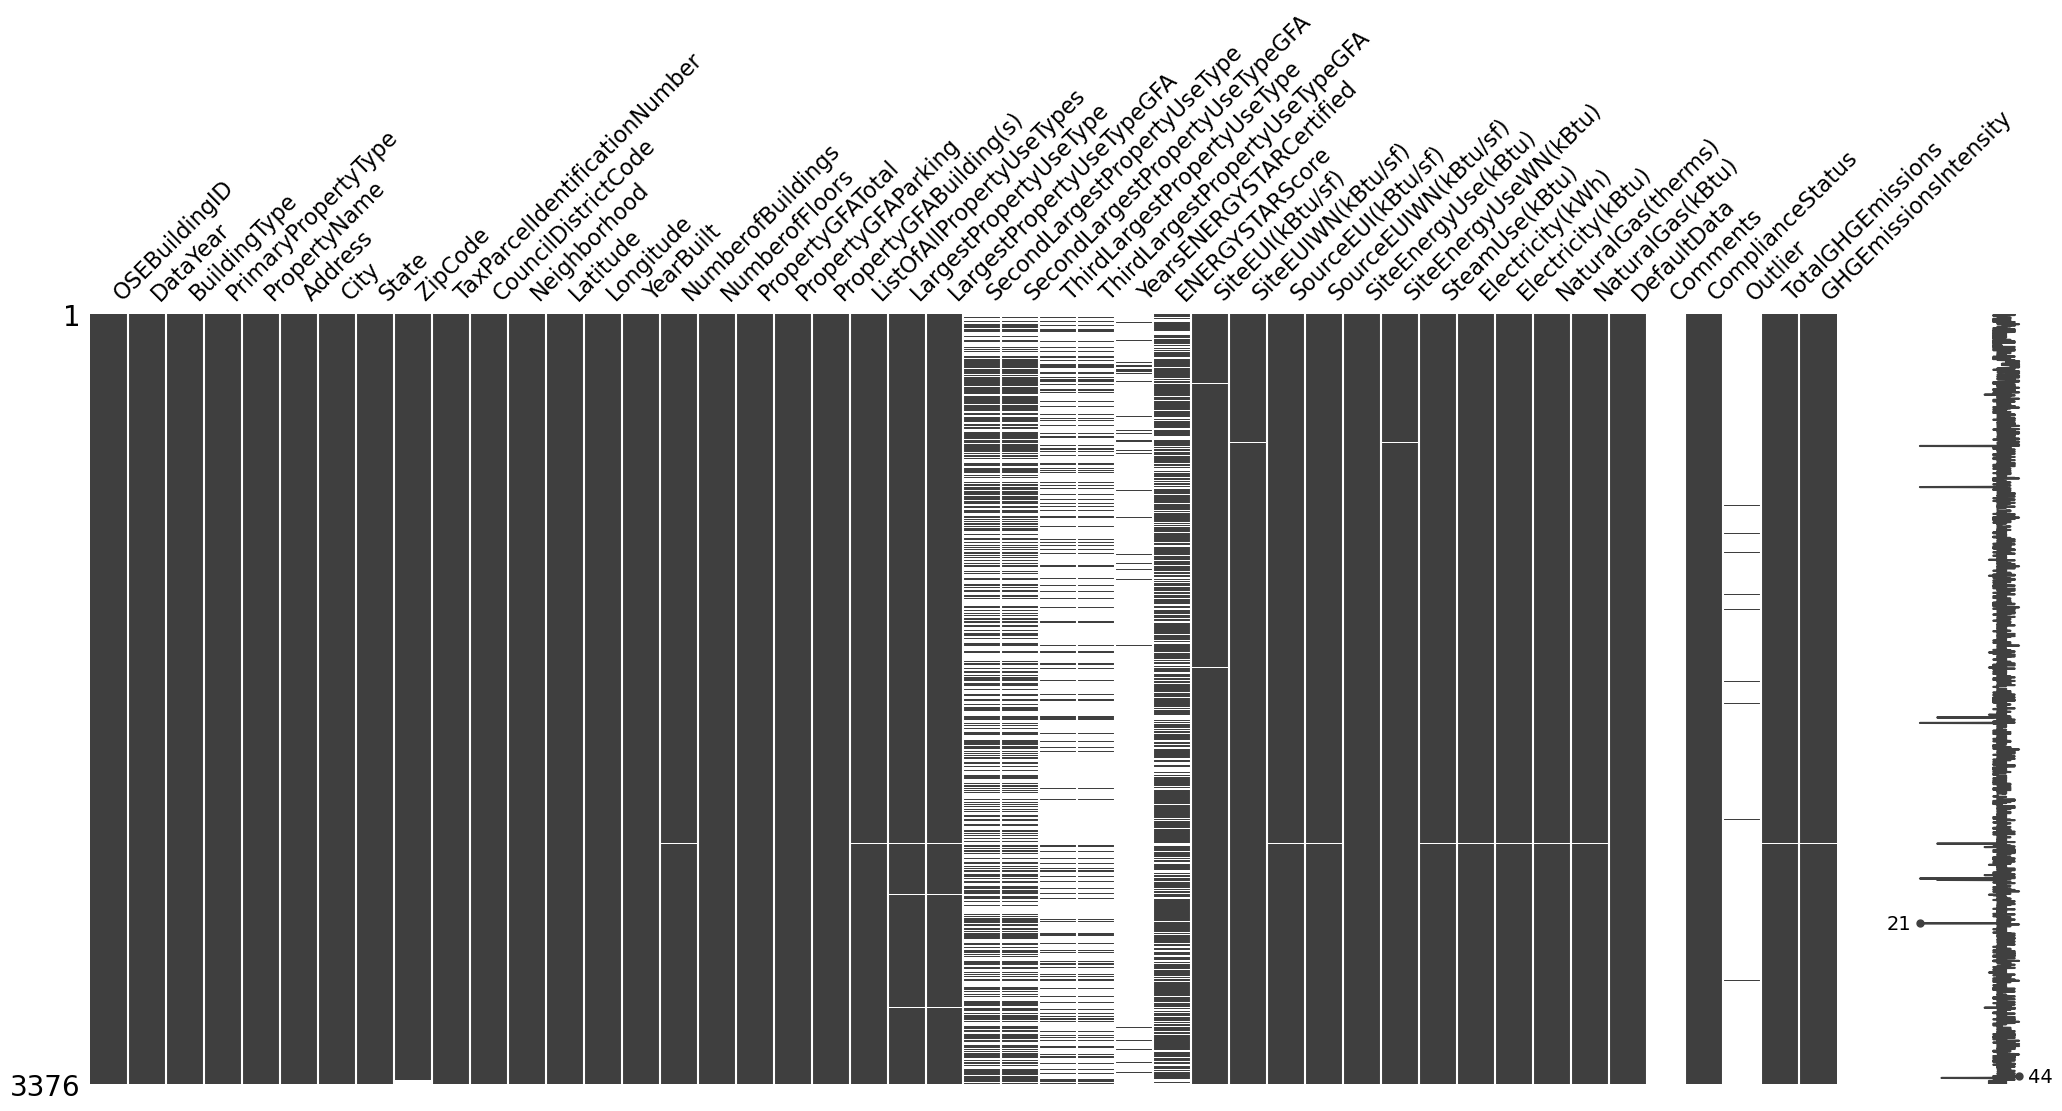

In [15]:
msno.matrix(data)

<Axes: >

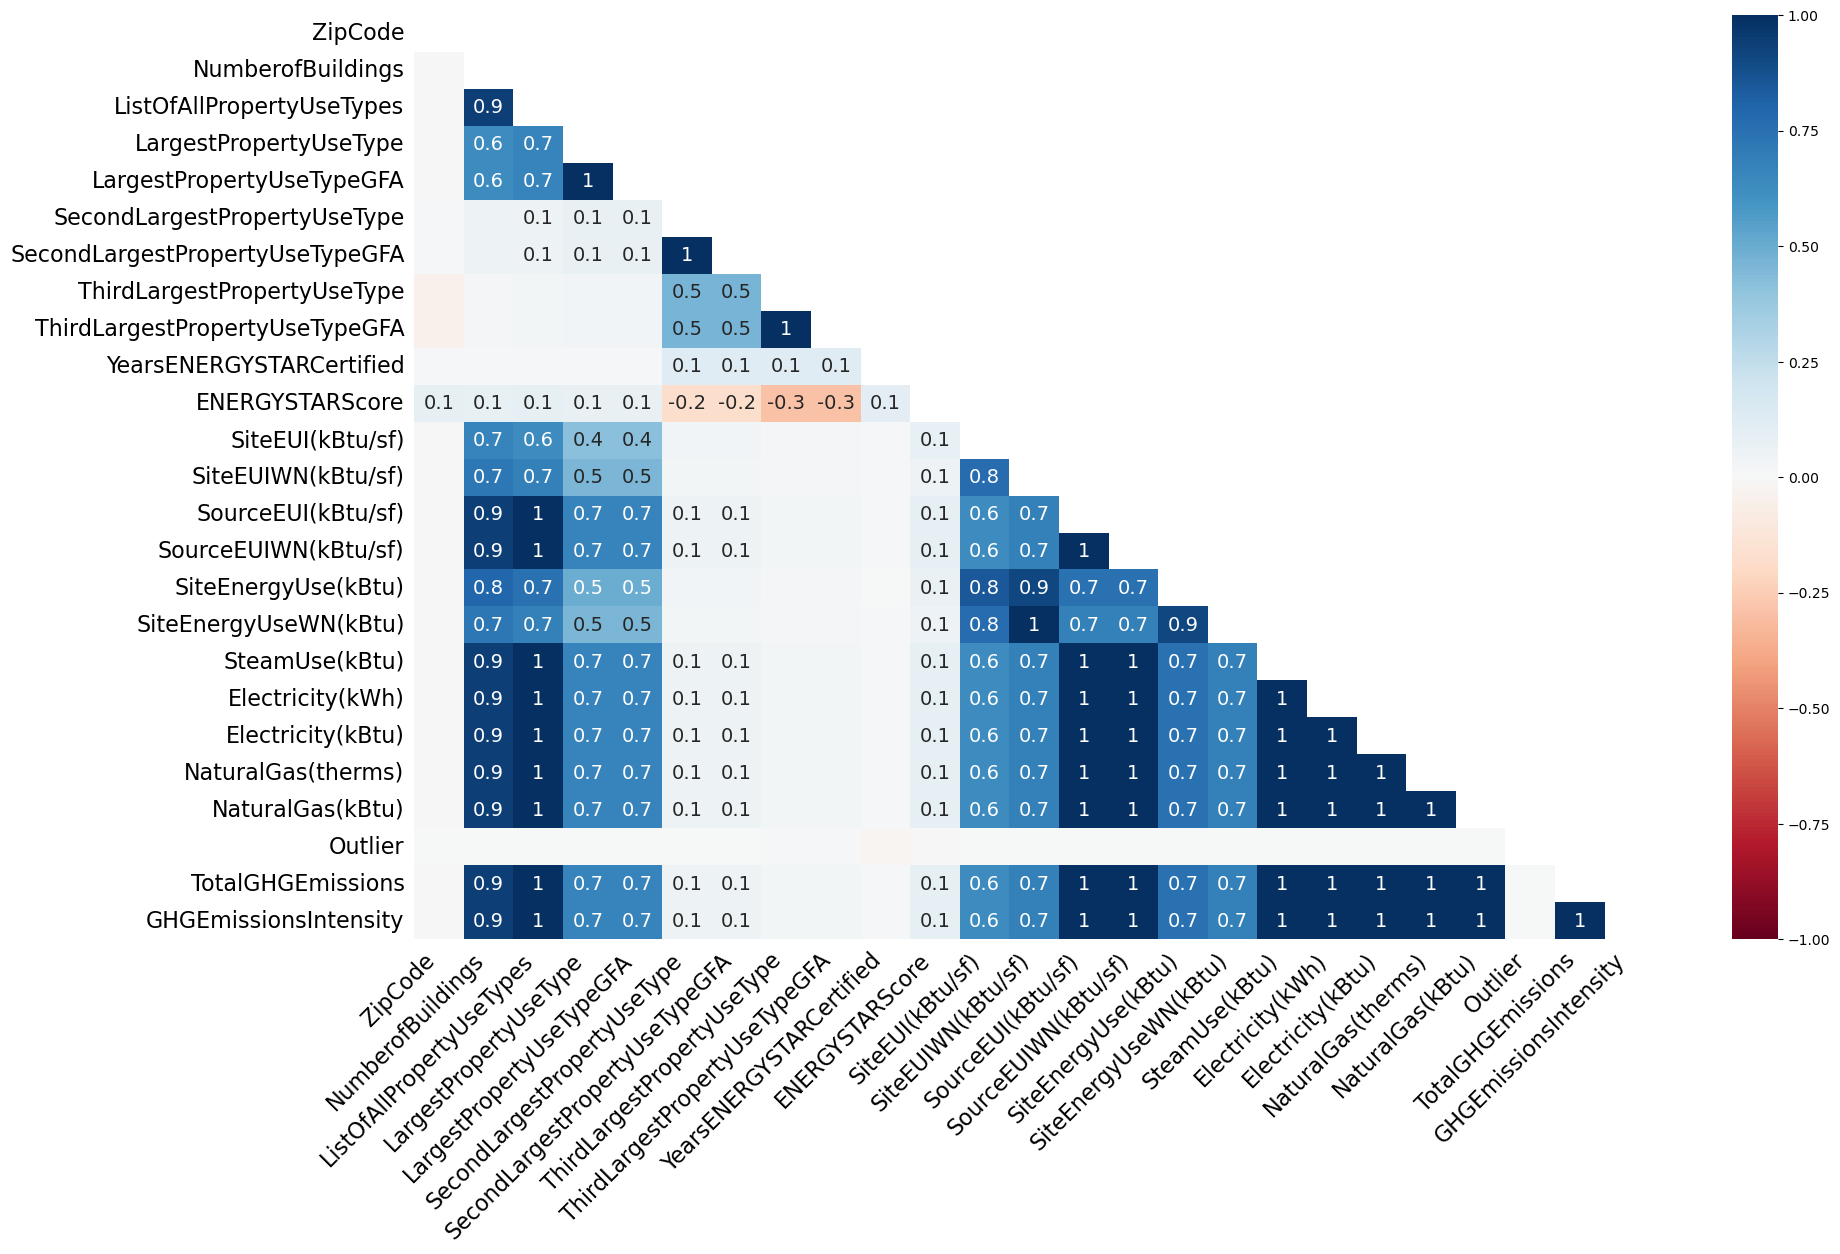

In [16]:
msno.heatmap(data)

## Définition et Compréhension des Variables

Après examen de la liste des variables et de leur définitions (https://data.seattle.gov/dataset/2016-Building-Energy-Benchmarking/2bpz-gwpy/about_data), nous avons établi la liste suivante :


| Name                          | Definition                                                                                     | Useful | Note |
|-------------------------------|------------------------------------------------------------------------------------------------|--------|------|
| OSEBuildingID                 | Identifiant unique attribué à chaque propriété couverte par l'ordonnance de référencement de Seattle. | Oui    | Essentiel pour suivre et identifier les propriétés |
| DataYear                      | Année civile représentée par chaque enregistrement de données.                                  | Non    |      |
| BuildingType                  | Classification du type de bâtiment de la ville de Seattle.                                     | Oui    | Utile pour des analyses par type de bâtiment |
| PrimaryPropertyType           | Utilisation principale d'une propriété (ex : bureau, magasin de détail).                        | Oui    | Utile pour des analyses par type d'utilisation |
| PropertyName                  | Nom officiel ou courant de la propriété.                                                        | Non    |      |
| Address                       | Adresse de la propriété.                                                                        | Oui    | Utile pour verifier les outliers |
| City                       | Ville de la propriété.                                                                        | Non    |      |
| State                       | Etat de la propriété.                                                                        | Non    |      |
| ZipCode                       | Code postal de la propriété.                                                                    | Oui    | Utile pour verifier les outliers |
| TaxParcelIdentificationNumber | Numéro d'identification de la parcelle fiscale de la propriété.                                 | Non    |      |
| CouncilDistrictCode           | Code du district du conseil de la ville de Seattle de la propriété.                             | Oui    | Utile pour des analyses géographiques |
| Neighborhood                  | Quartier de la propriété défini par le département des quartiers de la ville de Seattle.         | Oui    | Utile pour des analyses géographiques |
| Latitude                      | Latitude de la propriété.                                                                       | Oui    | Essentiel pour des analyses géospatiales |
| Longitude                     | Longitude de la propriété.                                                                      | Oui    | Essentiel pour des analyses géospatiales |
| YearBuilt                     | Année de construction de la propriété.                                                          | Oui    | Utile pour des analyses liées à l'âge du bâtiment |
| NumberofBuildings             | Nombre de bâtiments inclus dans le rapport de la propriété.                                     | Oui    | Utile pour des analyses de taille et de complexité |
| NumberofFloors                | Nombre d'étages signalés dans Portfolio Manager.                                                 | Oui    | Utile pour des analyses de taille et de complexité |
| PropertyGFATotal              | Surface brute totale du bâtiment et du parking.                                                 | Oui    | Utile pour des analyses de taille |
| PropertyGFAParking            | Espace total en pieds carrés de tous les types de stationnement.                                | Oui    | Utile pour des analyses de taille |
| PropertyGFABuilding(s)        | Surface brute totale en pieds carrés entre les surfaces extérieures des murs d'enceinte du bâtiment. | Oui    | Utile pour des analyses de taille |
| ListOfAllPropertyUseTypes     | Toutes les utilisations de la propriété signalées dans Portfolio Manager.                        | Non    |     |
| LargestPropertyUseType        | La plus grande utilisation de la propriété par la surface brute.                                | Oui    | Utile pour des analyses par type d'utilisation |
| LargestPropertyUseTypeGFA     | Surface brute de la plus grande utilisation de la propriété.                                    | Oui    | Utile pour des analyses par type d'utilisation |
| SecondLargestPropertyUseType  | La deuxième plus grande utilisation de la propriété par la surface brute.                        | Oui    | Utile pour des analyses par type d'utilisation |
| SecondLargestPropertyUseTypeGFA | Surface brute de la deuxième plus grande utilisation de la propriété.                          | Oui    | Utile pour des analyses par type d'utilisation |
| ThirdLargestPropertyUseType   | La troisième plus grande utilisation de la propriété par la surface brute.                       | Oui    | Utile pour des analyses par type d'utilisation |
| ThirdLargestPropertyUseTypeGFA| Surface brute de la troisième plus grande utilisation de la propriété.                          | Oui    | Utile pour des analyses par type d'utilisation |
| YearsENERGYSTARCertified      | Années où la propriété a reçu la certification ENERGY STAR.                                     | Non    |      |
| ENERGYSTARScore               | Score calculé pour évaluer la performance énergétique globale de la propriété.               | Oui    | Objectif |
| SiteEUI(kBtu/sf)              | Intensité d'utilisation de l'énergie sur site (EUI) de la propriété.                            | Oui    | Fuite des données mais utile pour des vérifications |
| SiteEUIWN(kBtu/sf)            | EUI du site normalisée (WN) de la propriété.                                  | Oui    | Fuite des données mais utile pour des vérifications |
| SourceEUI(kBtu/sf)            | Intensité d'utilisation de l'énergie source (EUI) de la propriété.                              | Oui    | Fuite des données mais utile pour des vérifications |
| SourceEUIWN(kBtu/sf)          | EUI de l'énergie source normalisée (WN) de la propriété.                            | Oui    | Fuite des données mais utile pour des vérifications |
| SiteEnergyUse(kBtu)           | Quantité annuelle d'énergie consommée par la propriété à partir de toutes les sources d'énergie. | Oui    | Fuite des données mais utile pour des vérifications |
| SiteEnergyUseWN(kBtu)         | Quantité annuelle d'énergie consommée par la propriété, ajustée aux conditions météorologiques moyennes sur 30 ans. | Oui | Objectif |
| SteamUse(kBtu)                | Quantité annuelle de vapeur de district consommée par la propriété sur place.                    | Oui    | Fuite des données mais peut indiquer la nature de la source d'energie |
| Electricity(kWh)              | Quantité annuelle d'électricité consommée par la propriété sur place.                            | Oui    | Fuite des données mais utile pour des vérifications |
| Electricity(kBtu)             | Quantité annuelle d'électricité consommée par la propriété sur place, mesurée en milliers de BTU. | Oui    | Fuite des données mais peut indiquer la nature de la source d'energie |
| NaturalGas(therms)            | Quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété.     | Oui    | Fuite des données mais utile pour des vérifications |
| NaturalGas(kBtu)              | Quantité annuelle de gaz naturel fourni par les services publics consommée par la propriété, mesurée en milliers de BTU. | Oui | Fuite des données mais peut indiquer la nature de la source d'energie |
| DefaultData                   | La propriété a utilisé des données par défaut pour au moins une caractéristique de la propriété.  | Non    |      |
| Comments                      | Commentaires d'un propriétaire ou d'un agent pour fournir un contexte à l'utilisation de l'énergie du bâtiment. | Non  |      |
| ComplianceStatus              | Si une propriété a respecté les exigences de référencement énergétique pour l'année de déclaration en cours. | Oui  |      |
| Outlier                       | Si une propriété est un cas extrême élevé ou faible (O/N).                                       | Oui    |      |
| TotalGHGEmissions             | Quantité totale d'émissions de gaz à effet de serre.                                             | Oui    | Objectif |
| GHGEmissionsIntensity         | Émissions totales de gaz à effet de serre divisées par la surface brute de la propriété.         | Oui    | Fuite des données mais utile pour des vérifications |

In [17]:
cols_to_drop = ['DataYear', 'City', 'State', 'PropertyName','TaxParcelIdentificationNumber', 'ListOfAllPropertyUseTypes',
                'YearsENERGYSTARCertified', 'DefaultData','Comments']

# Liste de toutes les colonnes à conserver
cols_to_keep = data.columns.difference(cols_to_drop)

# Nettoyage des Données

## Format des données

In [18]:
data[cols_to_keep].dtypes

Address                             object
BuildingType                        object
ComplianceStatus                    object
CouncilDistrictCode                  int64
ENERGYSTARScore                    float64
Electricity(kBtu)                  float64
Electricity(kWh)                   float64
GHGEmissionsIntensity              float64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
Latitude                           float64
Longitude                          float64
NaturalGas(kBtu)                   float64
NaturalGas(therms)                 float64
Neighborhood                        object
NumberofBuildings                  float64
NumberofFloors                       int64
OSEBuildingID                        int64
Outlier                             object
PrimaryPropertyType                 object
PropertyGFABuilding(s)               int64
PropertyGFAParking                   int64
PropertyGFATotal                     int64
SecondLarge

In [19]:
# Verification des années
print("Valeurs uniques pour YearBuilt dans data:", data['YearBuilt'].unique())

Valeurs uniques pour YearBuilt dans data: [1927 1996 1969 1926 1980 1999 1904 1910 1998 1928 1922 2004 1930 1983
 1907 1916 1985 1961 2001 1991 1955 1978 1949 1989 1906 1994 1992 1990
 1950 1900 1954 1911 1973 1920 1982 1908 1959 2000 1997 1962 1970 2008
 1948 1965 1929 2010 1938 1986 2002 1923 2003 1957 1964 1941 1963 2006
 1915 1958 2009 2011 1971 2007 1951 1953 1952 1960 1937 1966 1968 1925
 1924 2005 1909 1931 1972 1914 1913 1917 1995 1981 1976 1988 1979 1947
 1984 1956 1912 1977 1921 1945 1974 1975 1946 1967 1987 1940 1932 1993
 1918 1905 1902 1939 1944 1942 1903 2012 2013 2015 1901 1919 2014 1936
 1935]


Le format de l'année dans YearBuilt est en int mais ce n'est pas génant donc nous le laissons ainsi et remplaçons cette colonne par l'âge du batiment.

In [20]:
# Calculer l'âge des bâtiments et créer la colonne 'BuildingAge'
data['BuildingAge'] = 2016 - data['YearBuilt']

# Supprimer la colonne 'YearBuilt'
data.drop(columns=['YearBuilt'], inplace=True)

In [21]:
# Verification des BuildingType
print("Valeurs uniques pour BuildingType dans data:", data['BuildingType'].unique())

Valeurs uniques pour BuildingType dans data: ['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Campus' 'Multifamily LR (1-4)'
 'Multifamily HR (10+)' 'Nonresidential WA']


In [22]:
# Verification des ComplianceStatus
print("Valeurs uniques pour ComplianceStatus dans data:", data['ComplianceStatus'].unique())

Valeurs uniques pour ComplianceStatus dans data: ['Compliant' 'Error - Correct Default Data' 'Missing Data' 'Non-Compliant']


In [23]:
print(data['ComplianceStatus'].value_counts())

ComplianceStatus
Compliant                       3211
Error - Correct Default Data     113
Non-Compliant                     37
Missing Data                      15
Name: count, dtype: int64


In [24]:
print("Valeurs uniques pour Outlier dans data:", data['Outlier'].unique())

Valeurs uniques pour Outlier dans data: [nan 'High outlier' 'Low outlier']


In [25]:
# Verification des CouncilDistrictCode 
print("Valeurs uniques pour CouncilDistrictCode dans data:", data['CouncilDistrictCode'].unique())

Valeurs uniques pour CouncilDistrictCode dans data: [7 3 2 4 5 6 1]


In [26]:
# Verification des Neighborhood 
print("Valeurs uniques pour Neighborhood dans data:", data['Neighborhood'].unique())

Valeurs uniques pour Neighborhood dans data: ['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'Central' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'CENTRAL' 'SOUTHWEST' 'DELRIDGE' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']


In [27]:
# Corrections
data['Neighborhood'] = data['Neighborhood'].str.upper()
data['Neighborhood'] = data['Neighborhood'].str.replace('DELRIDGE NEIGHBORHOODS', 'DELRIDGE')
print("Valeurs uniques pour Neighborhood dans data:", data['Neighborhood'].unique())

Valeurs uniques pour Neighborhood dans data: ['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE']


In [28]:
# Vérification des ZipCode
print("Valeurs uniques pour ZipCode dans data:", data['ZipCode'].unique())

Valeurs uniques pour ZipCode dans data: [98101. 98121. 98104. 98154. 98118. 98105. 98112. 98125. 98109. 98070.
 98108. 98199. 98115. 98107. 98144. 98103. 98119. 98136. 98122. 98126.
 98133. 98146. 98033. 98106. 98111. 98134. 98117. 98116. 98191. 98164.
 98195. 98185. 98181. 98102. 98168. 98155. 98006. 98124. 98053. 98012.
 98013. 98028. 98178. 98114. 98127. 98165. 98011. 98198. 98113. 98040.
 98204. 98177. 98020. 98272. 98145.    nan]


In [29]:
# Vérification des LargestPropertyUseType
print("Valeurs uniques pour LargestPropertyUseType dans data:", data['LargestPropertyUseType'].unique())

Valeurs uniques pour LargestPropertyUseType dans data: ['Hotel' 'Police Station' 'Other - Entertainment/Public Assembly'
 'Multifamily Housing' 'Library' 'Fitness Center/Health Club/Gym'
 'Social/Meeting Hall' 'Courthouse' 'Other' 'K-12 School'
 'College/University' 'Automobile Dealership' 'Office'
 'Self-Storage Facility' 'Non-Refrigerated Warehouse' 'Other - Mall'
 'Senior Care Community' 'Medical Office' 'Retail Store'
 'Hospital (General Medical & Surgical)' 'Museum'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Other - Lodging/Residential' 'Residence Hall/Dormitory'
 'Other/Specialty Hospital' 'Financial Office' 'Distribution Center'
 'Parking' 'Worship Facility' 'Restaurant' 'Data Center' 'Laboratory'
 'Supermarket/Grocery Store' 'Convention Center'
 'Urgent Care/Clinic/Other Outpatient' nan 'Other - Services' 'Strip Mall'
 'Wholesale Club/Supercenter' 'Refrigerated Warehouse'
 'Manufacturing/Industrial Plant' 'Other - Recreation' 'Lifestyle Center'
 'Other - Public Servic

In [30]:
# Vérification des SecondLargestPropertyUseType
print("Valeurs uniques pour SecondLargestPropertyUseType dans data:", data['SecondLargestPropertyUseType'].unique())

Valeurs uniques pour SecondLargestPropertyUseType dans data: [nan 'Parking' 'Office' 'Restaurant' 'K-12 School' 'Laboratory'
 'Refrigerated Warehouse' 'Non-Refrigerated Warehouse' 'Other - Education'
 'Vocational School' 'Retail Store'
 'Personal Services (Health/Beauty, Dry Cleaning, etc)'
 'Other - Entertainment/Public Assembly' 'Data Center' 'Swimming Pool'
 'Other' 'Courthouse' 'Residence Hall/Dormitory' 'Distribution Center'
 'Self-Storage Facility' 'Other - Services' 'Movie Theater'
 'Supermarket/Grocery Store' 'Medical Office' 'Other - Recreation'
 'Convenience Store without Gas Station' 'Performing Arts'
 'College/University' 'Other - Restaurant/Bar' 'Adult Education'
 'Enclosed Mall' 'Multifamily Housing' 'Bar/Nightclub' 'Financial Office'
 'Repair Services (Vehicle, Shoe, Locksmith, etc)'
 'Manufacturing/Industrial Plant' 'Other - Lodging/Residential'
 'Bank Branch' 'Food Service' 'Worship Facility' 'Senior Care Community'
 'Fitness Center/Health Club/Gym' 'Hotel' 'Food Sales

In [31]:
# Vérification des ThirdLargestPropertyUseType
print("Valeurs uniques pour ThirdLargestPropertyUseType dans data:", data['ThirdLargestPropertyUseType'].unique())

Valeurs uniques pour ThirdLargestPropertyUseType dans data: [nan 'Restaurant' 'Swimming Pool' 'Data Center' 'Office' 'Retail Store'
 'Other - Entertainment/Public Assembly' 'Non-Refrigerated Warehouse'
 'Other' 'Distribution Center' 'Food Service' 'Other - Services'
 'Medical Office' 'Parking' 'Other - Utility'
 'Other - Lodging/Residential' 'K-12 School'
 'Fitness Center/Health Club/Gym' 'Social/Meeting Hall'
 'Pre-school/Daycare' 'Convenience Store without Gas Station'
 'Financial Office' 'Other - Restaurant/Bar' 'Other - Education'
 'Multifamily Housing' 'Laboratory' 'Bank Branch' 'Hotel'
 'Personal Services (Health/Beauty, Dry Cleaning, etc)'
 'Other - Recreation' 'Self-Storage Facility' 'Other - Technology/Science'
 'Refrigerated Warehouse' 'Fast Food Restaurant' 'Bar/Nightclub'
 'Manufacturing/Industrial Plant' 'Food Sales' 'Supermarket/Grocery Store'
 'Other/Specialty Hospital' 'Worship Facility' 'Strip Mall'
 'Residence Hall/Dormitory' 'Vocational School' 'College/University'
 

In [32]:
# Vérification des PrimaryPropertyType
print("Valeurs uniques pour PrimaryPropertyType dans data:", data['PrimaryPropertyType'].unique())

Valeurs uniques pour PrimaryPropertyType dans data: ['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility'
 'Warehouse' 'Large Office' 'Senior Care Community' 'Medical Office'
 'Retail Store' 'Hospital' 'Residence Hall' 'Distribution Center'
 'Worship Facility' 'Low-Rise Multifamily' 'Supermarket / Grocery Store'
 'Laboratory' 'Refrigerated Warehouse' 'Restaurant'
 'High-Rise Multifamily' 'Office']


Pas de problèmes sur le format des données des 'use Type'

## Sélection des données

Suppression des variables que nous n'avons pas trouvé pertinantes pour l'étude.

In [33]:
df_filtered = data.drop(columns=cols_to_drop).copy()

Notre étude porte uniquement sur les bâtiments non résidentiel, donc nous supprimons les bâtiments non concernés.

In [34]:
# Selection des batiments résidentiels
df_filtered = df_filtered[~df_filtered['BuildingType'].str.contains("Multifamily", na=False)].copy()
df_filtered = df_filtered[~df_filtered['PrimaryPropertyType'].str.contains("Multifamily", na=False)].copy()
df_filtered = df_filtered[~df_filtered['PrimaryPropertyType'].str.contains("Residence Hall", na=False)].copy()
df_filtered = df_filtered[~df_filtered['LargestPropertyUseType'].str.contains("Residence Hall/Dormitory", na=False)].copy()
df_filtered = df_filtered[~df_filtered['LargestPropertyUseType'].str.contains("Lodging", na=False)].copy()

In [35]:
df_filtered.shape

(1638, 37)

## Recherche des doublons

In [36]:
nb_doublons_code = df_filtered.duplicated(subset=["OSEBuildingID"]).sum()
print('Nombre de doublons sur le OSEBuildingID :', nb_doublons_code)

Nombre de doublons sur le OSEBuildingID : 0


In [37]:
nb_doublons_add = df_filtered.duplicated(subset=['Address','PropertyGFATotal']).sum()
print('Nombre de doublons sur l\'adresse :', nb_doublons_add)

Nombre de doublons sur l'adresse : 1


In [38]:
print(data[data.duplicated(['Address','PropertyGFATotal'], keep=False)].sort_values('Address'))

     OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
348            490      2016  NonResidential  Small- and Mid-Sized Office   
349            491      2016  NonResidential  Small- and Mid-Sized Office   

    PropertyName            Address     City State  ZipCode  \
348  North Tower  100 West Harrison  Seattle    WA  98119.0   
349  South Tower  100 West Harrison  Seattle    WA  98119.0   

    TaxParcelIdentificationNumber  CouncilDistrictCode           Neighborhood  \
348                    1989200720                    7  MAGNOLIA / QUEEN ANNE   
349                    1989200740                    7  MAGNOLIA / QUEEN ANNE   

     Latitude  Longitude  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
348  47.62224  -122.3585                1.0               5             87178   
349  47.62224  -122.3585                1.0               5             87178   

     PropertyGFAParking  PropertyGFABuilding(s) ListOfAllPropertyUseTypes  \
348          

Ce sont bien deux bâtiments différents (Tour nord et tour sud) donc  il n'y a pas de doublons.

## Gestion des valeurs aberrantes

In [39]:
df_filtered.dtypes.value_counts()

float64    21
object      9
int64       7
Name: count, dtype: int64

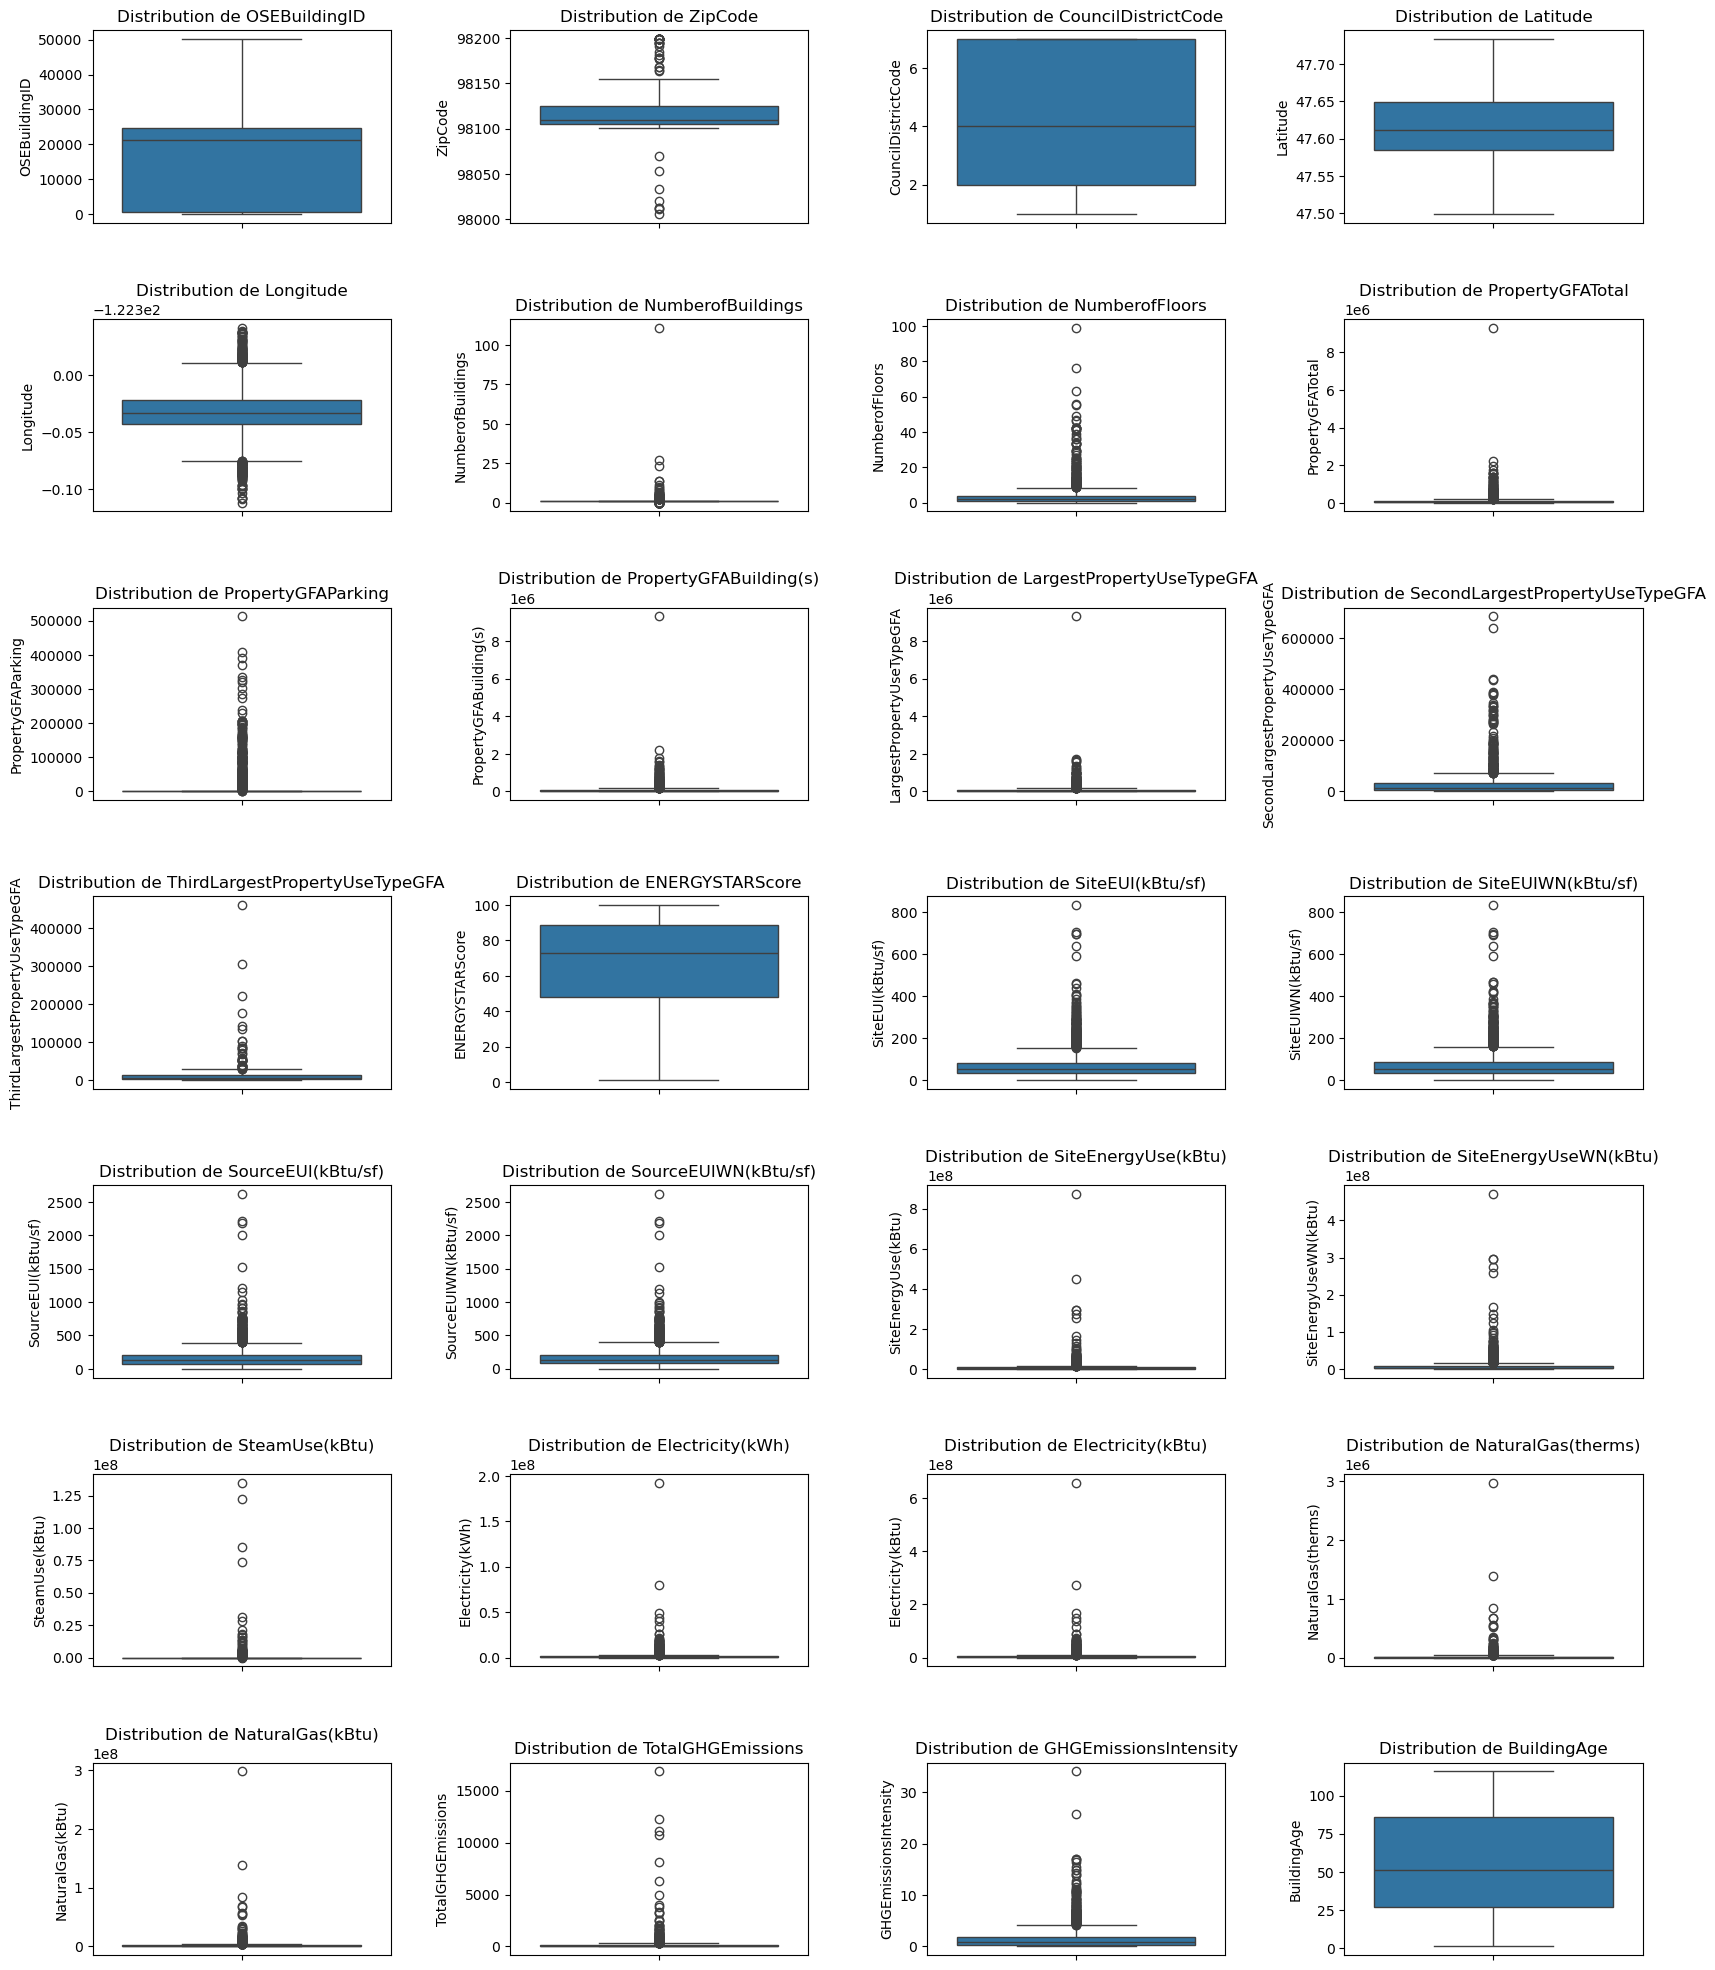

In [40]:
# Sélectionner uniquement les colonnes numériques
numerics_col = df_filtered.select_dtypes(include=['number']).columns
# Créer une figure avec des sous-graphiques pour chaque colonne numérique
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20,25))
plt.subplots_adjust(hspace=0.5, wspace=0.4)

for i, (ax, column) in enumerate(zip(axes.flatten(), numerics_col)):
    sns.boxplot(y=df_filtered[column], ax=ax)
    ax.set_title(f'Distribution de {column}')

# Supprimer les axes vides si le nombre de colonnes numériques est inférieur au nombre total d'axes
for j in range(i + 1, 28):
    fig.delaxes(axes.flatten()[j])

plt.show()

### Vérification des ZipCode

In [41]:
# Vérification des ZipCode
print("Valeurs uniques pour ZipCode dans data:", data['ZipCode'].unique())

Valeurs uniques pour ZipCode dans data: [98101. 98121. 98104. 98154. 98118. 98105. 98112. 98125. 98109. 98070.
 98108. 98199. 98115. 98107. 98144. 98103. 98119. 98136. 98122. 98126.
 98133. 98146. 98033. 98106. 98111. 98134. 98117. 98116. 98191. 98164.
 98195. 98185. 98181. 98102. 98168. 98155. 98006. 98124. 98053. 98012.
 98013. 98028. 98178. 98114. 98127. 98165. 98011. 98198. 98113. 98040.
 98204. 98177. 98020. 98272. 98145.    nan]


In [42]:
# Colonnes à afficher
cols_to_display = ['Address', 'ZipCode', 'Neighborhood', 'Latitude', 'Longitude']

# Filtrer les lignes où ZipCode est égal à 98145 puis afficher les colonnes spécifiées
filtered_df = df_filtered.loc[df_filtered['ZipCode'].isin([98145]), cols_to_display]

print(filtered_df)


               Address  ZipCode Neighborhood  Latitude  Longitude
3187  4500 40th Ave NE  98145.0    NORTHEAST  47.66201 -122.28386


D'après GoogleMaps, les coordonnées  47.66201, -122.28386 correspondent à cette adresse : 4800 40th Ave NE, Seattle, WA 98105, États-Unis => ZipCode à corriger

In [43]:
df_filtered.loc[df_filtered['Address'] == '4500 40th Ave NE', 'ZipCode'] = 98105

Les autres ZipCode correspondent bien à la métropole de Seattle.

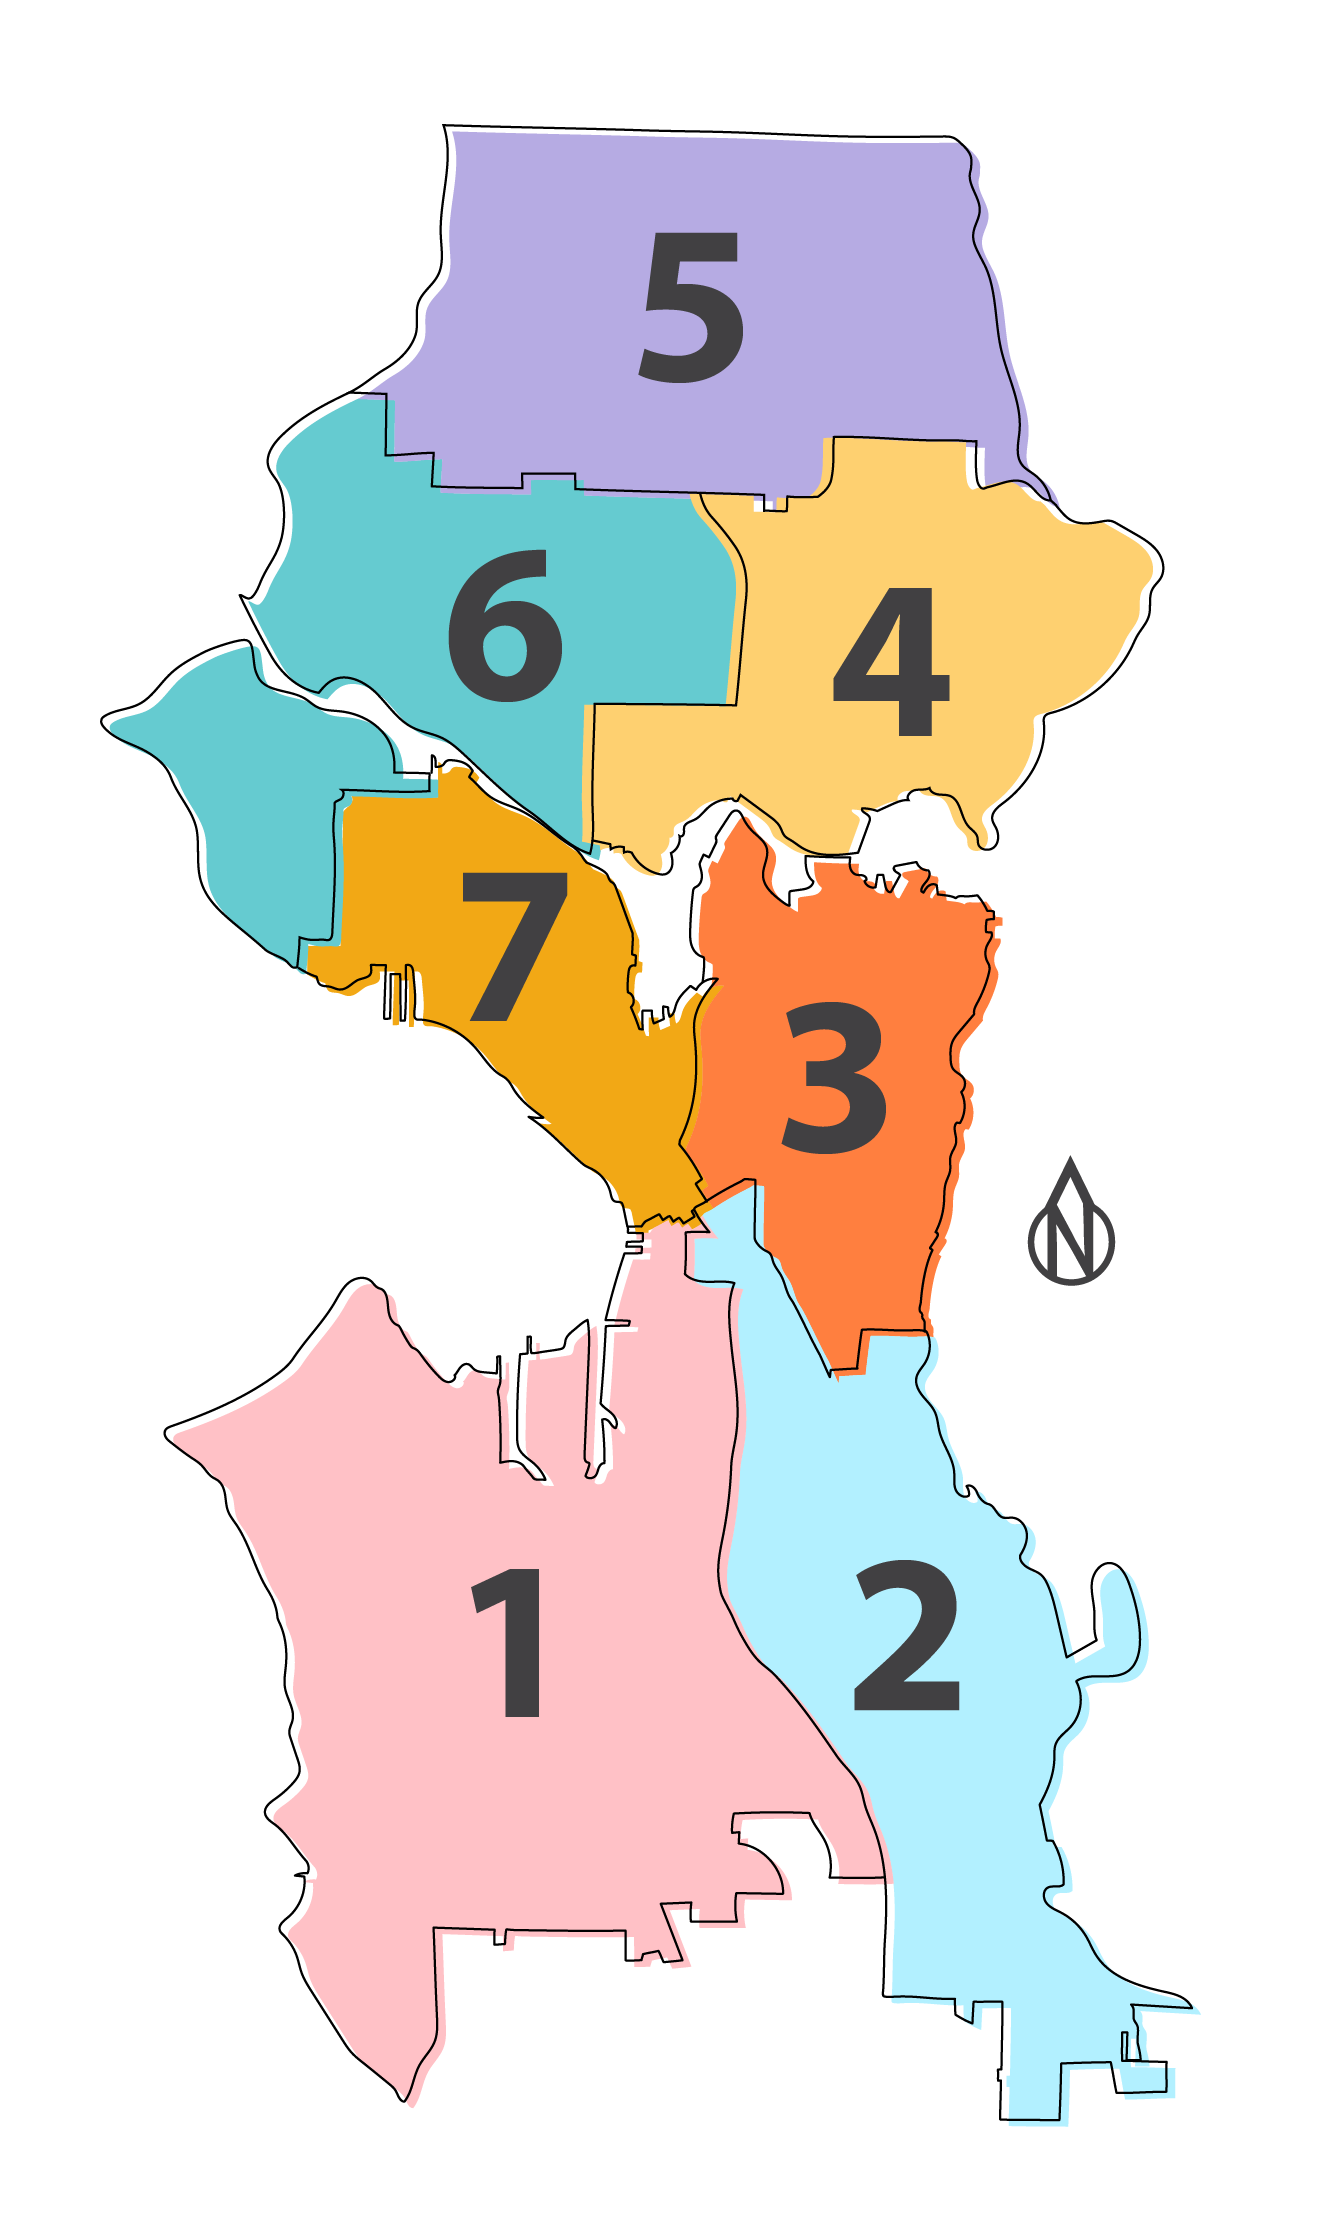

In [44]:
# Afficher les district de Seattle
Image(filename="Council District Map - 2024 - FULL.png", width=300, height=100)

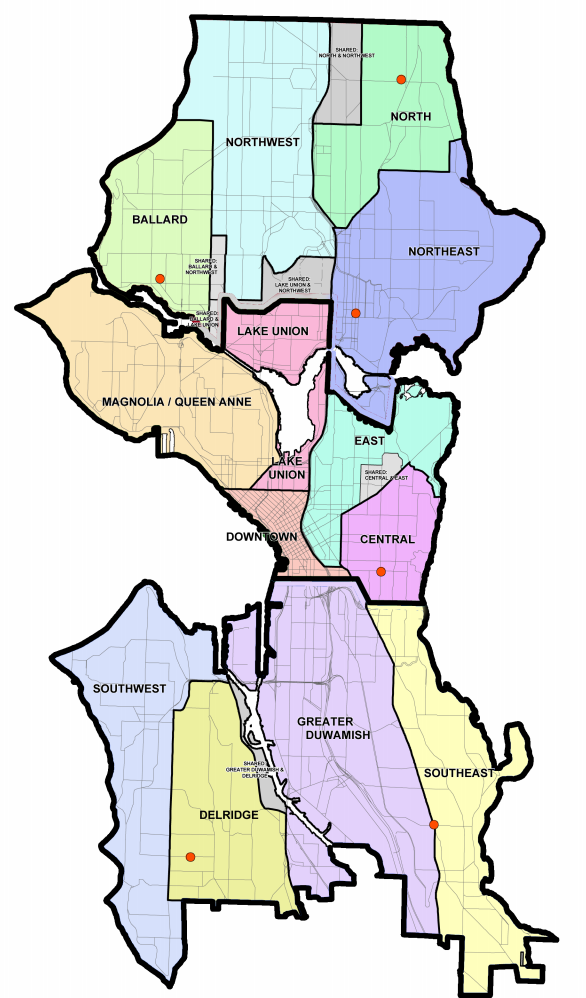

In [45]:
# Afficher les quartiers de Seattle
Image(filename="Map_of_Seattle,_divided_by_districts.png", width=400, height=150)

In [46]:
def find_outliers_by_group(df, groupby_var, outlier_var, iqr_multiplier):
    # Calculer les limites de l'IQR pour chaque groupe
    q1 = df.groupby(groupby_var)[outlier_var].quantile(0.25)
    q3 = df.groupby(groupby_var)[outlier_var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr

    # Initialiser une liste pour stocker les DataFrame des outliers
    outliers_list = []

    # Identifier les outliers pour chaque groupe
    for group in df[groupby_var].dropna().unique():
        lower_bound_group = lower_bound.get(group, np.nan)
        upper_bound_group = upper_bound.get(group, np.nan)
        # Utiliser les valeurs obtenues pour filtrer les outliers, en vérifiant aussi que les bornes ne sont pas NaN
        if not np.isnan(lower_bound_group) and not np.isnan(upper_bound_group):
            outliers_group = df[(df[groupby_var] == group) & 
                                ((df[outlier_var] < lower_bound_group) | 
                                 (df[outlier_var] > upper_bound_group))]
            if not outliers_group.empty:
                outliers_list.append(outliers_group)

    # Concaténer les DataFrame des outliers, en vérifiant d'abord si la liste n'est pas vide
    if outliers_list:
        outliers = pd.concat(outliers_list, ignore_index=True)
        return outliers
    else:
        return pd.DataFrame()  # Retourner un DataFrame vide si aucun outlier n'est trouvé



### Vérification de la longitude

Seattle :

    Longitude minimale : aux alentours de -122.436 (ouest)
    Longitude maximale : aux alentours de -122.255 (est)

In [47]:
# Définir les limites de longitude pour Seattle
longitude_min = -122.436
longitude_max = -122.255

# Sélectionner les lignes en dehors de cette fourchette de longitude
outliers_longitude = df_filtered[(df_filtered['Longitude'] < longitude_min) | (df_filtered['Longitude'] > longitude_max)]

# Afficher les valeurs aberrantes
outliers_longitude[['Address', 'ZipCode', 'Neighborhood', 'Latitude', 'Longitude', 'CouncilDistrictCode']]

,Address,ZipCode,Neighborhood,Latitude,Longitude,CouncilDistrictCode


Les valeurs sont donc atypiques mais pas abérrantes géographiquement parlant.

### Vérification des NumberofBuildings

In [48]:
# Compter et trier le nombre de valeurs
NumberofBuildings_counts = df_filtered['NumberofBuildings'].value_counts().sort_index(ascending=False)

pd.DataFrame({'NumberofBuildings': NumberofBuildings_counts})

,NumberofBuildings
NumberofBuildings,
111.0,1
27.0,1
23.0,1
14.0,2
11.0,1
10.0,1
9.0,1
8.0,2
7.0,1


Il y a forcément au moins 1 bâtiment par adresse, la valeur la plus fréquente étant 1 on remplace les 0 par 1

In [49]:
df_filtered.loc[df_filtered['NumberofBuildings'] == 0.] = 1.

Les adresses avec plus de 7 bâtiments sont à vérifier.

In [50]:
# Sélectionner les lignes où le nombre de bâtiments est supérieur à 10
buildings_over_10 = df_filtered[df_filtered['NumberofBuildings'] > 10]
buildings_over_10[['Address', 'ZipCode', 'NumberofBuildings', 'PrimaryPropertyType']]

,Address,ZipCode,NumberofBuildings,PrimaryPropertyType
105,6000 16th Ave SW,98106.0,27.0,University
128,9600 COLLEGE WAY N,98103.0,11.0,University
162,1420 S Trenton,98108.0,14.0,Large Office
1862,1900 West Nickerson Street,98119.0,23.0,Other
2325,3307 3rd Ave. W,98119.0,14.0,University
3274,NE 45th St & Brooklyn Ave,98105.0,111.0,University


Nombre de batiments pas abérrants sauf pour l'université avec 111 bâtiments. Il n'y a pas d'université à l'adresse indiqué et quant bien même cette valeur serait trop atypique et poserait problème pour nos modèles.

In [51]:
df_filtered = df_filtered.loc[df_filtered['NumberofBuildings'] != 111.]

### Vérification des NumberofFloors

In [52]:
# Compter et trier le nombre de valeurs
NumberofFloors_counts = df_filtered['NumberofFloors'].value_counts().sort_index(ascending=False)

pd.DataFrame({'NumberofFloors': NumberofFloors_counts})

,NumberofFloors
NumberofFloors,
99,1
76,1
63,1
56,1
55,1
49,1
47,1
46,1
42,5


In [53]:
# Colonnes à afficher
cols_to_display = ['Address', 'ZipCode','NumberofFloors', 'PrimaryPropertyType']
print(df_filtered[cols_to_display].loc[df_filtered['NumberofFloors'] >60])

                       Address  ZipCode  NumberofFloors PrimaryPropertyType
233           700 Fifth Avenue  98104.0              63        Large Office
559             701 5th Avenue  98104.0              76        Large Office
1359  5801 Beacon Avenue South  98108.0              99    Worship Facility


A corriger :

    5801 Beacon Avenue South correspond à une église => remplacer par 1

In [54]:
df_filtered.loc[df_filtered['Address'] == '5801 Beacon Avenue South', 'NumberofFloors'] = 1

In [55]:
outliers = find_outliers_by_group(df_filtered, 'PrimaryPropertyType', 'NumberofFloors', 3)
if not outliers.empty:
    display(outliers[['Address', 'ZipCode', 'NumberofFloors', 'PrimaryPropertyType']])
else:
    print("Aucun outlier trouvé.")

,Address,ZipCode,NumberofFloors,PrimaryPropertyType
0,1900 5th Avenue,98101.0,41,Hotel
1,1113 6th Ave,98101.0,33,Hotel
2,1400 6th Avenue,98101.0,34,Hotel
3,1000 Fourth Avenue,98154.0,11,Other
4,516 3RD AVE,98104.0,10,Other
5,500 5TH AVE,98104.0,19,Other
6,1900 9th Ave.,98101.0,11,Other
7,1122 3rd Ave,98101.0,15,Other
8,120 Lenora,98121.0,12,Other
9,2001 6th Ave,98121.0,33,Other


Un restaurant avec 13 étage et après vérification sur la carte, cela semble être une erreur de saisie.
Mise à 0 temporaire pour lui appliquer la moyenne.<br>
Après vérification, les autres bâtiments ne sont pas des outliers.

In [56]:
df_filtered.loc[df_filtered['Address'] == '1411 1st Avenue', 'NumberofFloors'] = 0

Aux USA on compte le rez de chaussée comme un étage. Il y a donc necessairement au moins 1 étage par batiment.
Nous allons donc remplacer les valeurs à 0 par la moyenne en fonction de leur PrimaryPropertyType.

In [57]:
# Calculer la médiane du nombre d'étages pour chaque type de propriété et convertir en entiers
mean_floors_by_type = df_filtered[df_filtered['NumberofFloors'] > 0].groupby('PrimaryPropertyType')['NumberofFloors'].median().astype(int)


# Fonction pour remplacer les zéros par la moyenne correspondante
def replace_zero_with_mean(row):
    if row['NumberofFloors'] == 0:
        return mean_floors_by_type.get(row['PrimaryPropertyType'], 0)
    else:
        return row['NumberofFloors']


In [58]:
# Appliquer la fonction à la colonne 'NumberofFloors'
df_filtered['NumberofFloors'] = df_filtered.apply(replace_zero_with_mean, axis=1)

### Vérification des PropertyGFA

Le PropertyGFATotal ne peut pas par définition être plus petit que la somme des GFA des 3 principales utilisations. Ce sont donc des erreurs qu'il faut supprimer.

In [59]:
def check_total_vs_sum(row):
    # Vérifier si PropertyGFATotal est NaN et exclure de la vérification
    if pd.isna(row['PropertyGFATotal']):
        return False

    # Remplacer les NaN par 0 pour ce calcul uniquement
    largest_gfa = row['LargestPropertyUseTypeGFA'] if pd.notna(row['LargestPropertyUseTypeGFA']) else 0
    second_largest_gfa = row['SecondLargestPropertyUseTypeGFA'] if pd.notna(row['SecondLargestPropertyUseTypeGFA']) else 0
    third_largest_gfa = row['ThirdLargestPropertyUseTypeGFA'] if pd.notna(row['ThirdLargestPropertyUseTypeGFA']) else 0

    # Calculer la somme des trois plus grandes utilisations de la propriété
    total_gfa = largest_gfa + second_largest_gfa + third_largest_gfa

    # Vérifier si PropertyGFATotal est inférieur ou égale à cette somme (marge de 15%)'
    return row['PropertyGFATotal'] < (total_gfa * 0.85)

# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_total_vs_sum, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)



Nombre de lignes considérées comme outliers : 178


In [60]:
# Afficher un échantillon des outliers
sample_outliers = outliers.sample(n=10)
sample_outliers[['PropertyGFATotal', 'PrimaryPropertyType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]


,PropertyGFATotal,PrimaryPropertyType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
358,1,1.0,1.0,1.0,1.0,1.0
1212,38148,Small- and Mid-Sized Office,37853.0,Retail Store,12495.0,NaN
1244,1,1.0,1.0,1.0,1.0,1.0
494,1,1.0,1.0,1.0,1.0,1.0
2214,1,1.0,1.0,1.0,1.0,1.0
255,50176,Small- and Mid-Sized Office,50328.0,Other,8329.0,4253.0
72,571329,Large Office,598801.0,Parking,310699.0,26203.0
2138,27760,Other,19715.0,Office,12000.0,6000.0
260,298426,Large Office,286538.0,Parking,197750.0,11888.0
2524,153312,Senior Care Community,148590.0,Parking,72317.0,4722.0


L'échantillon des outliers trouvé semble bien représenter des erreurs de saisie. Nous devons donc les supprimer du dataset.

In [61]:
# Supprimer les outliers du DataFrame
df_filtered = df_filtered[df_filtered['is_outlier'] == False]

# Supprimer la colonne 'is_outlier'
df_filtered = df_filtered.drop(columns=['is_outlier'])

In [62]:
df_filtered.shape

(1459, 37)

GFABuilding + GFAPArking est sensé être égale à GFATotal

In [63]:
def check_GFATotal_vs_GFABuilding_and_Parking(row):
    # Vérifier si PropertyGFATotal, PropertyGFABuilding(s) ou PropertyGFAParking est NaN et exclure de la vérification
    if pd.isna(row['PropertyGFATotal']) or pd.isna(row['PropertyGFABuilding(s)']) or pd.isna(row['PropertyGFAParking']):
        return False

    # Calculer la somme de PropertyGFABuilding(s) et PropertyGFAParking
    total_gfa_calculated = row['PropertyGFABuilding(s)'] + row['PropertyGFAParking']

    # Calculer les marges de 20% pour plus ou moins
    lower_bound = total_gfa_calculated * 0.80
    upper_bound = total_gfa_calculated * 1.20

    # Vérifier si PropertyGFATotal est dans la marge de tolérance
    return not (lower_bound <= row['PropertyGFATotal'] <= upper_bound)

# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_GFATotal_vs_GFABuilding_and_Parking, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)


Nombre de lignes considérées comme outliers : 0


Cas des Parking, certains useType sont appelés Parking et peuvent donc fausser les résulats.<br>
Mais commencons par renommer les "other" qui correspondent à des Parking.

In [64]:
# Calculer la plage de tolérance de 10% pour PropertyGFAParking
tolerance = df_filtered['PropertyGFAParking'] * 0.10

# Mettre à jour PrimaryPropertyType en Parking sous les conditions spécifiées avec tolérance
df_filtered.loc[(df_filtered['PrimaryPropertyType'] == "Other") & 
                (df_filtered['LargestPropertyUseTypeGFA'] >= df_filtered['PropertyGFAParking'] - tolerance) & 
                (df_filtered['LargestPropertyUseTypeGFA'] <= df_filtered['PropertyGFAParking'] + tolerance), 'PrimaryPropertyType'] = "Parking"

# Mettre à jour SecondLargestPropertyUseType en Parking sous les conditions spécifiées avec tolérance
df_filtered.loc[(df_filtered['SecondLargestPropertyUseType'] == "Other") & 
                (df_filtered['LargestPropertyUseTypeGFA'] >= df_filtered['PropertyGFAParking'] - tolerance) & 
                (df_filtered['LargestPropertyUseTypeGFA'] <= df_filtered['PropertyGFAParking'] + tolerance), 'SecondLargestPropertyUseType'] = "Parking"

# Mettre à jour ThirdLargestPropertyUseType en Parking sous les conditions spécifiées avec tolérance
df_filtered.loc[(df_filtered['ThirdLargestPropertyUseType'] == "Other") & 
                (df_filtered['LargestPropertyUseTypeGFA'] >= df_filtered['PropertyGFAParking'] - tolerance) & 
                (df_filtered['LargestPropertyUseTypeGFA'] <= df_filtered['PropertyGFAParking'] + tolerance), 'ThirdLargestPropertyUseType'] = "Parking"


On vérifie que PropertyGFAParking = PropertyUseTypeGFA si PropertyUseType = Parking (5% de marge)

In [65]:
def check_parking_gfa_compliance(row):
    # Vérifier si PropertyGFATotal est NaN et exclure de la vérification
    if (row['PropertyGFAParking'] == 0):
        return False
    
    parking_gfa = row['PropertyGFAParking']
    is_inconsistent = False  # Initialiser un drapeau pour indiquer l'incohérence

    # Calculer les marges pour chaque type de propriété et vérifier les conditions avec la marge de 5%
    for property_type in ['Largest', 'SecondLargest', 'ThirdLargest']:
        property_use_type = row.get(f'{property_type}PropertyUseType', None)
        property_type_gfa = row.get(f'{property_type}PropertyUseTypeGFA', 0)
        
        if property_use_type == "Parking":
            # Calculer la différence en valeur absolue et la marge de 5%
            diff = abs(parking_gfa - property_type_gfa)
            margin = 0.05 * property_type_gfa
            
            # Vérifier si la différence dépasse la marge de 5%
            if diff > margin:
                is_inconsistent = True  # Marquer comme incohérent si la condition est remplie

    return is_inconsistent

# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_parking_gfa_compliance, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)


Nombre de lignes considérées comme outliers : 128


In [66]:
#### Afficher un échantillon des outliers
sample_outliers = outliers.sample(n=10)
sample_outliers[['PropertyGFATotal', 'PropertyGFAParking', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]


,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
611,413264,138098,Office,295494.0,Parking,94781.0,NaN
395,75844,19928,Other,28442.0,Office,28441.0,18961.0
474,286000,111774,Parking,111774.0,Office,108747.0,49271.0
248,543876,116721,Office,424044.0,Parking,107300.0,NaN
467,75600,10800,Distribution Center,51040.0,Office,10500.0,6000.0
612,122400,54300,Office,41624.0,Parking,33399.0,20740.0
349,87178,20416,Office,66747.0,Parking,28285.0,NaN
2530,1206670,201857,Office,319361.0,Multifamily Housing,181047.0,177210.0
583,446261,124788,Office,343400.0,Parking,114237.0,NaN
1288,25132,7308,Office,8061.0,Parking,8000.0,2095.0


L'échantillon des outliers trouvé semble bien représenter des erreurs de saisie. Nous devons donc les supprimer du dataset.

In [67]:
# Supprimer les outliers du DataFrame
df_filtered = df_filtered[df_filtered['is_outlier'] == False]

# Supprimer la colonne 'is_outlier'
df_filtered = df_filtered.drop(columns=['is_outlier'])

On vérifie si PropertyGFATotal est bien égale à la somme de tous les GFA parking compris avec une marge de 20%.

In [68]:
def check_property_gfa(row):
    # Pas d'évaluation si PropertyGFATotal est nan
    if pd.isna(row['PropertyGFATotal']):
        return False
    
    # Initialiser total_gfa_sum avec PropertyGFAParking si ce n'est pas nan
    total_gfa_sum = row['PropertyGFAParking'] if pd.notna(row['PropertyGFAParking']) else 0
    
    # Ajouter LargestPropertyUseTypeGFA à total_gfa_sum si ce n'est pas Parking ou nan
    if row['PrimaryPropertyType'] != "Parking" and pd.notna(row['LargestPropertyUseTypeGFA']):
        total_gfa_sum += row['LargestPropertyUseTypeGFA']
    
    # Ajouter SecondLargestPropertyUseTypeGFA à total_gfa_sum si ce n'est pas Parking ou nan
    if row['SecondLargestPropertyUseType'] != "Parking" and pd.notna(row['SecondLargestPropertyUseTypeGFA']):
        total_gfa_sum += row['SecondLargestPropertyUseTypeGFA']
    
    # Ajouter ThirdLargestPropertyUseTypeGFA à total_gfa_sum si ce n'est pas Parking ou nan
    if row['ThirdLargestPropertyUseType'] != "Parking" and pd.notna(row['ThirdLargestPropertyUseTypeGFA']):
        total_gfa_sum += row['ThirdLargestPropertyUseTypeGFA']

    # Calculer les marges de 15% et 25% pour plus ou moins
    lower_bound = total_gfa_sum * 0.85
    upper_bound = total_gfa_sum * 1.25
    
    # Vérifier si PropertyGFATotal est dans la marge de tolérance
    return not (lower_bound <= row['PropertyGFATotal'] <= upper_bound)


# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_property_gfa, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)


Nombre de lignes considérées comme outliers : 120


In [69]:
# Afficher un échantillon des outliers
sample_outliers = outliers.sample(n=10)
sample_outliers[['PropertyGFATotal', 'PropertyGFAParking', 'PrimaryPropertyType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]


,PropertyGFATotal,PropertyGFAParking,PrimaryPropertyType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
2687,38675,0,Small- and Mid-Sized Office,12100.0,Restaurant,4281.0,NaN
2904,21656,0,Mixed Use Property,5656.0,Other - Public Services,5561.0,5090.0
604,73320,0,Mixed Use Property,27283.0,Office,23277.0,6540.0
2149,36879,0,Small- and Mid-Sized Office,16855.0,NaN,NaN,NaN
166,934292,0,Hotel,495536.0,Parking,438756.0,49700.0
578,63150,0,Small- and Mid-Sized Office,NaN,NaN,NaN,NaN
3187,330000,0,Hospital,241500.0,NaN,NaN,NaN
491,97720,0,Small- and Mid-Sized Office,51881.0,Data Center,11999.0,9713.0
70,91213,0,Other,65000.0,NaN,NaN,NaN
1664,42975,0,K-12 School,21405.0,NaN,NaN,NaN


L'échantillon des outliers trouvé semble bien représenter des erreurs de saisie. Nous devons donc les supprimer du dataset.

In [70]:
# Supprimer les outliers du DataFrame
df_filtered = df_filtered[df_filtered['is_outlier'] == False]

# Vous pouvez choisir de supprimer la colonne 'is_outlier'
df_filtered = df_filtered.drop(columns=['is_outlier'])

In [71]:
df_filtered.shape

(1211, 37)

Le LargestPropertyUseTypeGFA doit etre > que le SecondLargest > ThirdLargest, sinon ce sont donc des erreurs qu'il faut supprimer.

In [72]:
def check_property_use_gfa_hierarchy(row):
    # Remplacer les valeurs manquantes par 0 pour cette vérification seulement
    largest_gfa = row['LargestPropertyUseTypeGFA'] if pd.notna(row['LargestPropertyUseTypeGFA']) else 0
    second_largest_gfa = row['SecondLargestPropertyUseTypeGFA'] if pd.notna(row['SecondLargestPropertyUseTypeGFA']) else 0
    third_largest_gfa = row['ThirdLargestPropertyUseTypeGFA'] if pd.notna(row['ThirdLargestPropertyUseTypeGFA']) else 0
    
    # Vérifier la hiérarchie des valeurs GFA
    return largest_gfa < second_largest_gfa or second_largest_gfa < third_largest_gfa

# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_property_use_gfa_hierarchy, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)


Nombre de lignes considérées comme outliers : 0


### Vérification de l'Energy

Vérification de la cohérance avec les unités pour l'electricité

In [73]:
def check_electricity_coherence(row):
    # Pas d'évaluation si Electricity est nan
    if pd.isna(row['Electricity(kWh)']) or pd.isna(row['Electricity(kBtu)']):
        return False

    # Conversion: 1 kWh = 3.41214 kBtu
    electricity_kwh_to_btu = row['Electricity(kWh)'] * 3.41214

    # Calculer la marge de tolérance
    lower_bound = electricity_kwh_to_btu * 0.95
    upper_bound = electricity_kwh_to_btu * 1.05

    # La condition vérifie si la valeur en kBtu est hors de la marge de tolérance
    return not(lower_bound <= row['Electricity(kBtu)'] <= upper_bound)
    

In [74]:
# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_electricity_coherence, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)

Nombre de lignes considérées comme outliers : 2


In [75]:
# Supprimer les outliers du DataFrame
df_filtered = df_filtered[df_filtered['is_outlier'] == False]

# Vous pouvez choisir de supprimer la colonne 'is_outlier'
df_filtered = df_filtered.drop(columns=['is_outlier'])

Vérification de la cohérance avec les unités pour le gaz

In [76]:
def check_natural_gas_coherence(row):
    # Pas d'évaluation si NaturalGas est nan
    if (pd.isna(row['NaturalGas(therms)']) or pd.isna(row['NaturalGas(kBtu)'])):
        return False
        
    # Conversion: 100 kBtu  = 1 therm
    natural_gas_therms_to_btu = row['NaturalGas(therms)'] * 100
    
    # Calculer la marge de tolérance
    lower_bound = natural_gas_therms_to_btu * 0.95
    upper_bound = natural_gas_therms_to_btu * 1.05

    # La condition vérifie si la valeur en kBtu est hors de la marge de tolérance
    return not(lower_bound <= row['NaturalGas(kBtu)'] <= upper_bound)


In [77]:
# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_natural_gas_coherence, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)

Nombre de lignes considérées comme outliers : 0


Vérification de la cohérance pour SiteEnergyUseWN(kBtu) et SiteEnergyUse(kBtu)

In [78]:
def check_SiteEnergyUse_coherence(row):
    # Pas d'évaluation si SiteEnergyUse est nan
    if (pd.isna(row['SiteEnergyUseWN(kBtu)']) or pd.isna(row['SiteEnergyUse(kBtu)'])):
        return False
    
    # Calculer la marge de tolérance
    lower_bound = row['SiteEnergyUse(kBtu)'] * 0.8
    upper_bound = row['SiteEnergyUse(kBtu)'] * 1.25

    # La condition vérifie si la valeur en kBtu est hors de la marge de tolérance
    return not(lower_bound <= row['SiteEnergyUseWN(kBtu)'] <= upper_bound)

In [79]:
# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_SiteEnergyUse_coherence, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)

Nombre de lignes considérées comme outliers : 7


In [80]:
outliers[['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)']]

,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu)
220,2.490613e+07,0.0
247,2.682322e+07,0.0
284,5.446624e+06,0.0
882,4.964773e+05,0.0
953,1.128179e+06,0.0
3275,5.000717e+06,0.0
3277,5.116831e+07,0.0


In [81]:
# Mise à jour des valeurs
df_filtered.loc[df_filtered['SiteEnergyUseWN(kBtu)'] == 0, 'SiteEnergyUseWN(kBtu)'] = df_filtered['SiteEnergyUse(kBtu)']

Vérification de la cohérance pour SiteEUIWN(kBtu) et SiteEUI(kBtu)

In [82]:
def check_SiteEUI_coherence(row):
    # Pas d'évaluation si SiteEUI est nan
    if (pd.isna(row['SiteEUIWN(kBtu/sf)']) or pd.isna(row['SiteEUI(kBtu/sf)'])):
        return False
    
    # Calculer la marge de tolérance
    lower_bound = row['SiteEUI(kBtu/sf)'] * 0.8
    upper_bound = row['SiteEUI(kBtu/sf)'] * 1.25

    # La condition vérifie si la valeur en kBtu est hors de la marge de tolérance
    return not(lower_bound <= row['SiteEUIWN(kBtu/sf)'] <= upper_bound)

In [83]:
# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_SiteEUI_coherence, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)

Nombre de lignes considérées comme outliers : 7


In [84]:
outliers[['SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)']]

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf)
220,105.199997,0.0
247,73.000000,0.0
284,43.400002,0.0
882,20.700001,0.0
953,37.599998,0.0
3275,85.099998,0.0
3277,252.000000,0.0


In [85]:
# Mise à jour des valeurs
df_filtered.loc[df_filtered['SiteEUIWN(kBtu/sf)'] == 0, 'SiteEUIWN(kBtu/sf)'] = df_filtered['SiteEUI(kBtu/sf)']

Vérification de la cohérance pour SourceEUIWN(kBtu) et SourceEUI(kBtu)

In [86]:
def check_SourceEUI_coherence(row):
    # Pas d'évaluation si SourceEUI est nan
    if (pd.isna(row['SourceEUIWN(kBtu/sf)']) or pd.isna(row['SourceEUI(kBtu/sf)'])):
        return False
    
    # Calculer la marge de tolérance
    lower_bound = row['SourceEUI(kBtu/sf)'] * 0.8
    upper_bound = row['SourceEUI(kBtu/sf)'] * 1.25

    # La condition vérifie si la valeur en kBtu est hors de la marge de tolérance
    return not(lower_bound <= row['SourceEUIWN(kBtu/sf)'] <= upper_bound)

In [87]:
# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_SourceEUI_coherence, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)

Nombre de lignes considérées comme outliers : 7


In [88]:
# Mise à jour des valeurs
df_filtered.loc[df_filtered['SourceEUIWN(kBtu/sf)'] == 0, 'SourceEUIWN(kBtu/sf)'] = df_filtered['SourceEUI(kBtu/sf)']

Vérification de la cohérance pour SiteEUIWN(kBtu/sf) et SourceEUIWN(kBtu/sf)

In [89]:
def check_Source_Site_coherence(row):
    # Pas d'évaluation si SourceEUI est nan
    if (pd.isna(row['SourceEUIWN(kBtu/sf)']) or pd.isna(row['SiteEUI(kBtu/sf)'])):
        return False
    
    # Calculer la marge de tolérance
    upper_bound = row['SourceEUI(kBtu/sf)'] * 1.1

    # La condition vérifie si la valeur en kBtu est hors de la marge de tolérance
    return not(row['SiteEUI(kBtu/sf)'] <= upper_bound)

In [90]:
# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_Source_Site_coherence, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)

Nombre de lignes considérées comme outliers : 3


Vérification de la cohérance pour SiteEUIWN(kBtu/sf) et SiteEnergyUseWN(kBtu)

In [91]:
def check_SiteEUI_SiteEnergyUse(row):
    # Pas d'évaluation si SourceEUI est nan
    if (pd.isna(row['SiteEnergyUseWN(kBtu)']) or pd.isna(row['SiteEUIWN(kBtu/sf)'])):
        return False
    
    # Calculer la marge de tolérance
    lower_bound = row['SiteEUIWN(kBtu/sf)'] * 0.8 * row['PropertyGFATotal']
    upper_bound = row['SiteEUIWN(kBtu/sf)'] * 1.2 * row['PropertyGFATotal']

    # La condition vérifie si la valeur en kBtu est hors de la marge de tolérance
    return not(lower_bound <= row['SiteEnergyUseWN(kBtu)'] <= upper_bound)

In [92]:
# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_SiteEUI_SiteEnergyUse, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)

Nombre de lignes considérées comme outliers : 103


In [93]:
# Afficher un échantillon des outliers
sample_outliers = outliers.sample(n=10)
# Créer une nouvelle colonne pour le calcul
sample_outliers['Calculated_SiteEnergyUseWN(kBtu)'] = sample_outliers['SiteEUIWN(kBtu/sf)'] * sample_outliers['PropertyGFATotal']

# Sélectionner les colonnes d'intérêt pour l'affichage
calculated_vs_actual = sample_outliers[['Calculated_SiteEnergyUseWN(kBtu)', 'SiteEnergyUseWN(kBtu)']]

calculated_vs_actual


,Calculated_SiteEnergyUseWN(kBtu),SiteEnergyUseWN(kBtu)
247,3.631845e+07,2.682322e+07
79,8.518389e+06,5.274523e+06
360,2.606344e+07,1.152170e+07
785,3.314354e+06,2.249630e+06
2680,8.333274e+06,6.197824e+06
2050,3.851966e+06,1.849331e+06
1096,8.112768e+06,4.843339e+06
3073,1.153920e+06,7.697718e+05
2078,2.941598e+06,2.108862e+06
454,4.688301e+06,3.740114e+06


L'échantillon des outliers trouvé semble bien représenter des erreurs de saisie. Nous devons donc les supprimer du dataset.

In [94]:
# Supprimer les outliers du DataFrame
df_filtered = df_filtered[df_filtered['is_outlier'] == False]

# Vous pouvez choisir de supprimer la colonne 'is_outlier'
df_filtered = df_filtered.drop(columns=['is_outlier'])

Vérification de la somme pour arriver à SiteEnergyUse(kBtu)

In [95]:
def check_sum_energy(row):
    # Pas d'évaluation si SiteEnergyUseWN(kBtu) est nan
    if pd.isna(row['SiteEnergyUse(kBtu)']):
        return False
    
    # Calculer la somme avec les valeurs manquantes remplacées temporairement par 0
    total_nrj_sum = (row['Electricity(kBtu)'] if pd.notna(row['Electricity(kBtu)']) else 0) + \
                    (row['SteamUse(kBtu)'] if pd.notna(row['SteamUse(kBtu)']) else 0) + \
                    (row['NaturalGas(kBtu)'] if pd.notna(row['NaturalGas(kBtu)']) else 0)

    # Calculer la marge de tolérance
    lower_bound = total_nrj_sum * 0.8
    upper_bound = total_nrj_sum * 1.2

    # La condition vérifie si la valeur en kBtu est hors de la marge de tolérance
    return not(lower_bound <= row['SiteEnergyUse(kBtu)'] <= upper_bound)


In [96]:
# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_sum_energy, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)

Nombre de lignes considérées comme outliers : 17


In [97]:
# Afficher un échantillon des outliers
sample_outliers = outliers.sample(n=10)
sample_outliers[['SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'SteamUse(kBtu)', 'NaturalGas(kBtu)']]


,SiteEnergyUse(kBtu),Electricity(kBtu),SteamUse(kBtu),NaturalGas(kBtu)
2791,4729846.5,1323792.0,0.0,0.0
630,0.0,1433596.0,0.0,0.0
3277,51168308.0,28614613.0,0.0,0.0
139,0.0,0.0,0.0,3217877.0
133,0.0,0.0,0.0,4318917.0
81,0.0,1698176.0,0.0,0.0
3166,0.0,0.0,0.0,4993620.0
513,12525174.0,0.0,0.0,0.0
95,0.0,2104286.0,0.0,0.0
1280,2485521.0,1509514.0,137900.0,374537.0


L'échantillon des outliers trouvé semble bien représenter des erreurs de saisie. Nous devons donc les supprimer du dataset.

In [98]:
# Supprimer les outliers du DataFrame
df_filtered = df_filtered[df_filtered['is_outlier'] == False]

# Vous pouvez choisir de supprimer la colonne 'is_outlier'
df_filtered = df_filtered.drop(columns=['is_outlier'])

In [99]:
df_filtered.shape

(1089, 37)

### Vérification de TotalGHGEmissions

In [100]:
df_filtered.head(1)

,OSEBuildingID,BuildingType,PrimaryPropertyType,Address,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
0,1,NonResidential,Hotel,405 Olive way,98101.0,7,DOWNTOWN,47.6122,-122.33799,1.0,12,88434,0,88434,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.5,189.0,7226362.5,7456910.0,2003882.0,1156514.25,3946027.0,12764.5293,1276453.0,Compliant,NaN,249.98,2.83,89


In [101]:
def check_TotalGHGEmissions(row):
    # Pas d'évaluation si TotalGHGEmissions est nan
    if (pd.isna(row['TotalGHGEmissions']) or pd.isna(row['GHGEmissionsIntensity'])):
        return False
    
    # Calculer la marge de tolérance
    lower_bound = row['GHGEmissionsIntensity'] * 0.8 * row['PropertyGFATotal'] / 1000
    upper_bound = row['GHGEmissionsIntensity'] * 1.2 * row['PropertyGFATotal'] / 1000

    # La condition vérifie si la valeur est hors de la marge de tolérance
    return not(lower_bound <= row['TotalGHGEmissions'] <= upper_bound)

In [102]:
# Appliquer la fonction à chaque ligne du DataFrame pour identifier les outliers
df_filtered['is_outlier'] = df_filtered.apply(check_TotalGHGEmissions, axis=1)

# Sélectionner les lignes considérées comme outliers
outliers = df_filtered[df_filtered['is_outlier']]

# Afficher le nombre de lignes considérées comme outliers
num_outliers = len(outliers)
print("Nombre de lignes considérées comme outliers :", num_outliers)

Nombre de lignes considérées comme outliers : 4


In [103]:
# Créer une nouvelle colonne pour le calcul
copy_outliers = outliers.copy()
copy_outliers['Calculated_GHG'] = copy_outliers['GHGEmissionsIntensity'] * copy_outliers['PropertyGFATotal'] / 1000

# Sélectionner les colonnes d'intérêt pour l'affichage
copy_outliers[['Calculated_GHG', 'GHGEmissionsIntensity', 'TotalGHGEmissions']]

,Calculated_GHG,GHGEmissionsIntensity,TotalGHGEmissions
595,0.71718,0.01,1.06
609,3.41264,0.02,4.20
2189,0.00000,0.00,0.12
3152,0.39212,0.01,0.50


L'échantillon des outliers trouvé semble bien représenter des erreurs de saisie. Nous devons donc les supprimer du dataset.

In [104]:
# Supprimer les outliers du DataFrame
df_filtered = df_filtered[df_filtered['is_outlier'] == False]

# Vous pouvez choisir de supprimer la colonne 'is_outlier'
df_filtered = df_filtered.drop(columns=['is_outlier'])

### Impact des CompliantStatus et Outlier

In [105]:
print(df_filtered['ComplianceStatus'].value_counts())

ComplianceStatus
Compliant                       990
Error - Correct Default Data     84
Non-Compliant                     8
Missing Data                      3
Name: count, dtype: int64


ComplianceStatus :

    - Non-Compliant indique que le bâtiment n'a pas satisfait certaines exigences de reporting ou de performance, ce qui pourrait signifier que les données associées sont incomplètes ou peu fiables.
    - Les bâtiments avec des erreurs dans leur statut de conformité ("Error") peuvent également souffrir de problèmes de données qui compromettent leur utilité pour l'analyse et la modélisation.
    
Inclure ces bâtiments pourrait introduire un biais ou de l'incertitude dans vos analyses.
=> Suppression, On conserve les Compliant et Missing Data



In [106]:
df_filtered = df_filtered[~df_filtered['ComplianceStatus'].str.contains("Non-Compliant", na=False)].copy()
df_filtered = df_filtered[~df_filtered['ComplianceStatus'].str.contains("Error", na=False)].copy()

In [107]:
print(df_filtered['Outlier'].value_counts())

Series([], Name: count, dtype: int64)


Après ce nettoyage on constate qu'il n'y a plus d'Outliers.

## Traitement des valeurs manquantes

In [108]:
df_filtered.shape

(993, 37)

Maintenant que le tri des valeurs abérrantes a été fait, on peut supprimer les dernière colonnes qui ne nous servirons pas pour nos modèles.

In [109]:
cols_to_drop = ['Address', 'ComplianceStatus', 'Electricity(kWh)', 'GHGEmissionsIntensity','NaturalGas(therms)', 
                'OSEBuildingID', 'Outlier', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'PropertyGFABuilding(s)',
                'SiteEnergyUse(kBtu)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)']

df_selected = df_filtered.drop(columns=cols_to_drop).copy()

In [110]:
missing_values_count = df_selected.isnull().sum()
total_cells = np.product(df_selected.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 13.25 %


In [111]:
percent_missing_values =  round((missing_values_count / len(df_selected)) * 100, 2)
missing_data = pd.concat([missing_values_count, percent_missing_values], axis=1, keys=['Nombre de valeurs manquantes', 'Pourcentage de valeurs manquantes'])
display(missing_data)

,Nombre de valeurs manquantes,Pourcentage de valeurs manquantes
BuildingType,0,0.00
PrimaryPropertyType,0,0.00
ZipCode,13,1.31
CouncilDistrictCode,0,0.00
Neighborhood,0,0.00
Latitude,0,0.00
Longitude,0,0.00
NumberofBuildings,0,0.00
NumberofFloors,0,0.00
PropertyGFATotal,0,0.00


### Complétion à 0

In [112]:
# Créer une copie du DataFrame
df_completed = df_selected.copy()

In [113]:
# Fonction pour calculer la somme des GFA et comparer avec PropertyGFATotal
def adjust_gfa_values(row):
    # Calculer la somme des GFA, en remplaçant les NaN par 0
    gfa_sum = np.nansum([
        row.get('LargestPropertyUseTypeGFA', 0),
        row.get('SecondLargestPropertyUseTypeGFA', 0),
        row.get('ThirdLargestPropertyUseTypeGFA', 0),
        row.get('PropertyGFAParking', 0)
    ])
    
    # Calculer une marge de 5% pour PropertyGFATotal
    lower_bound = row['PropertyGFATotal'] * 0.95
    upper_bound = row['PropertyGFATotal'] * 1.05
    
    # Vérifier si la somme des GFA est dans la marge de 5% de PropertyGFATotal
    if lower_bound <= gfa_sum <= upper_bound:
        # Remplacer les NaN par 0 pour les colonnes spécifiées
        for col in ['SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA', 'PropertyGFAParking']:
            if pd.isna(row[col]):
                row[col] = 0
    return row


In [114]:
# Appliquer la fonction adjust_gfa_values à chaque ligne
df_completed = df_completed.apply(adjust_gfa_values, axis=1)

In [115]:
def adjust_property_use_type(row):
    if row['SecondLargestPropertyUseTypeGFA'] == 0 and pd.isna(row['SecondLargestPropertyUseType']):
        row['SecondLargestPropertyUseType'] = "None"
    if row['ThirdLargestPropertyUseTypeGFA'] == 0 and pd.isna(row['ThirdLargestPropertyUseType']):
        row['ThirdLargestPropertyUseType'] = "None"
    return row

# Appliquer la fonction pour ajuster les valeurs de PropertyUseType sur le DataFrame complet
df_completed = df_completed.apply(adjust_property_use_type, axis=1)


### Calcul

L'utilisation des propriétés est cruciale pour notre etude, nous allons tenter de compléter les valeurs manquantes

In [116]:
def fill_missing_types_and_calculate_gfa(row):
    largest_gfa = row['LargestPropertyUseTypeGFA']
    parking_gfa = row['PropertyGFAParking']
    
    # Pour SecondLargestPropertyUseType
    if pd.isna(row['SecondLargestPropertyUseType']):
        row['SecondLargestPropertyUseType'] = "Other"
        # Calculer SecondLargestPropertyUseTypeGFA en soustrayant LargestPropertyUseTypeGFA et PropertyGFAParking de PropertyGFATotal
        row['SecondLargestPropertyUseTypeGFA'] = row['PropertyGFATotal'] - largest_gfa - parking_gfa
        row['ThirdLargestPropertyUseType'] = "None"
        row['ThirdLargestPropertyUseTypeGFA'] = 0
        
    # Pour ThirdLargestPropertyUseType
    if pd.isna(row['ThirdLargestPropertyUseType']):
        row['ThirdLargestPropertyUseType'] = "Other"
        # Calculer ThirdLargestPropertyUseTypeGFA en soustrayant LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, et PropertyGFAParking de PropertyGFATotal
        second_largest_gfa = row['SecondLargestPropertyUseTypeGFA']
        row['ThirdLargestPropertyUseTypeGFA'] = row['PropertyGFATotal'] - largest_gfa - second_largest_gfa - parking_gfa

    return row

# Appliquer la fonction pour ajuster les valeurs de Type et calculer les GFA
df_completed = df_completed.apply(fill_missing_types_and_calculate_gfa, axis=1)


### Traitement des fuites de données

Electricity(kBtu), SteamUse(kBtu) et NaturalGas(kBtu) sont des fuites de données. Nous ne voulons pas les récupérer pour nos prédictions mais nous pouvons tout de même savoir leur taux d'utilisation dans le bâtiment.

In [117]:
cols_energie = ['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']

# Calcul du pourcentage d'utilisation pour chaque type d'énergie
for col in cols_energie:
    df_completed[col + '_pct'] = (df_completed[col] / df_completed['SiteEnergyUseWN(kBtu)']) * 100

# supprimer les colonnes des energie kBtu
df_completed = df_completed.drop(columns=cols_energie).copy()

In [118]:
df_completed.head(5)

,BuildingType,PrimaryPropertyType,ZipCode,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,BuildingAge,SteamUse(kBtu)_pct,Electricity(kBtu)_pct,NaturalGas(kBtu)_pct
0,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61220,-122.33799,1.0,12,88434,0,Hotel,88434.0,None,0.0,None,0.0,60.0,7456910.0,249.98,89,26.872820,52.917723,17.117720
1,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61317,-122.33393,1.0,11,103566,15064,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,8664479.0,295.86,20,0.000000,37.426959,59.381320
3,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61412,-122.33664,1.0,10,61320,0,Hotel,61320.0,None,0.0,None,0.0,56.0,6946800.5,286.43,90,31.877211,39.858983,26.072621
6,NonResidential,Hotel,98101.0,7,DOWNTOWN,47.61390,-122.33283,1.0,11,83008,0,Hotel,81352.0,None,0.0,None,0.0,27.0,6062767.5,176.14,90,0.000000,46.368511,48.617731
7,NonResidential,Other,98101.0,7,DOWNTOWN,47.61327,-122.33136,1.0,8,102761,0,Other - Entertainment/Public Assembly,102761.0,None,0.0,None,0.0,NaN,7067881.5,221.51,90,32.206065,51.453254,5.449851


In [119]:
missing_values_count = df_completed.isnull().sum()
total_cells = np.product(df_completed.shape)
total_missing = missing_values_count.sum()
percent_missing = (total_missing/total_cells) * 100
print('Le pourcentage de valeurs manquantes est de', round(percent_missing, 2),'%')

Le pourcentage de valeurs manquantes est de 1.66 %


<Axes: title={'center': 'Valeurs présentes dans notre jeu de données'}>

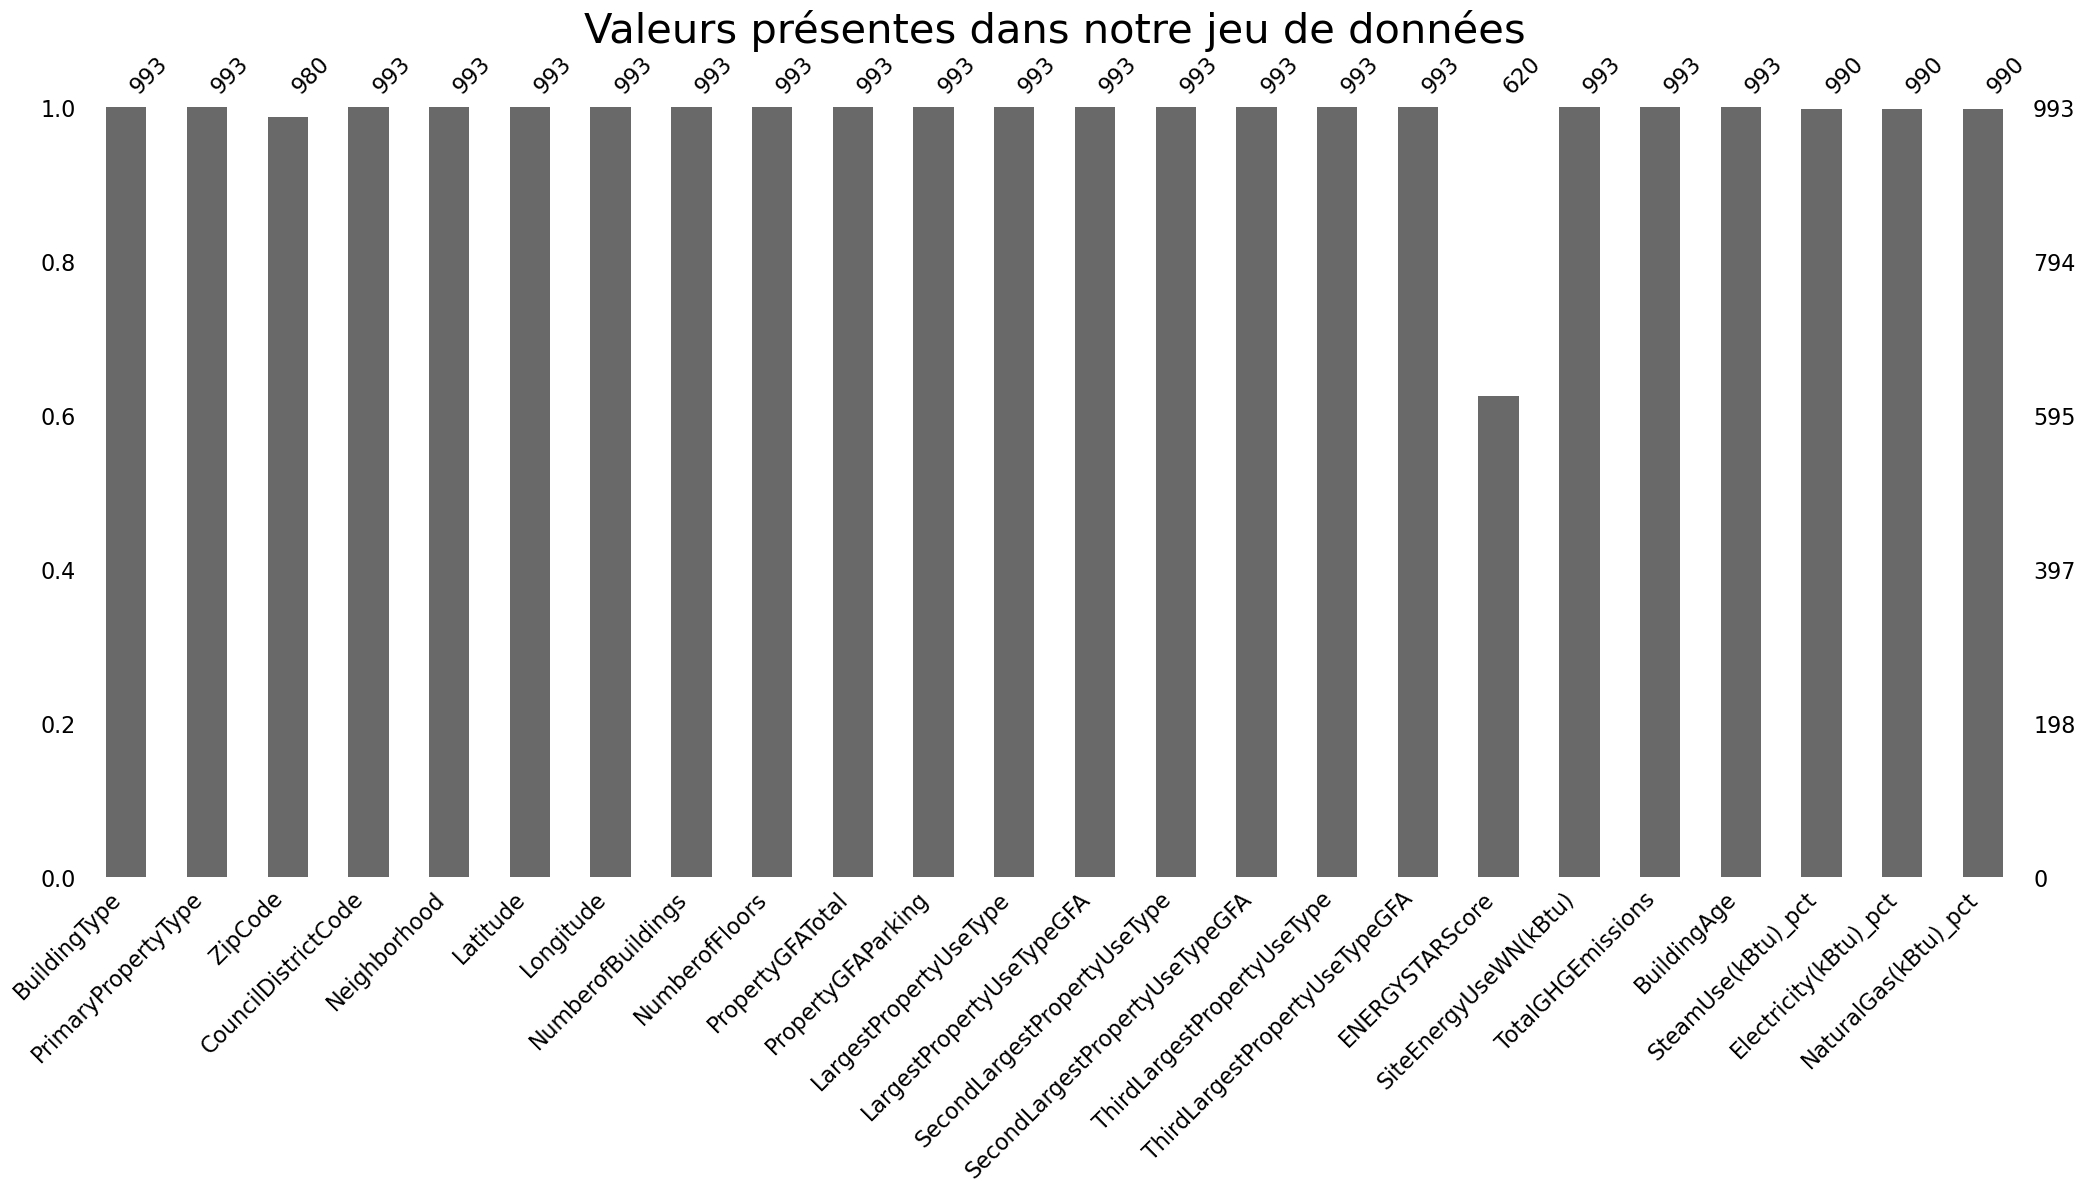

In [120]:
plt.title("Valeurs présentes dans notre jeu de données", fontsize=30)
msno.bar(df_completed)

Les données manquantes sont celles de l'EnergyStarScore, comme nous voulons en étudier l'intérêt pour nos modèles nous allons conserver un dataframe avec l'energystarscore à part.

In [121]:
df_with_EnergyStarScore = df_completed.dropna()

In [122]:
df_with_EnergyStarScore.shape

(620, 24)

In [123]:
df = df_completed.drop(columns=['ENERGYSTARScore'])
df.shape

(993, 23)

# Analyse Exploratoire des Données

## Analyse Univariée

## Analyse Bivariée

## Analyse Multivariée

# Feature Engineering